In [1]:
import pandas as pd
import os
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
f_o = 'original/sens_trends/plot_data/1.0/kin_sens_trend_plot103.csv'
f_b = 'bm/sens_trends/plot_data/1.0/kin_sens_trend_plot103.csv'
df_original = pd.read_csv(f_o)
df_bm = pd.read_csv(f_b)

In [3]:
df_original

,Reactions,Ratio,SYNGAS Selec,SYNGAS Yield,CO Selectivity,CO % Yield,H2 Selectivity,H2 % Yield,CH4 Conversion,H2O+CO2 Selectivity,H2O+CO2 yield,Exit Temp,Peak Temp,Dist to peak temp,O2 Conversion,Max CH4 Conv,Dist to 50 CH4 Conv
0,103.0,2.6,0.000000,0.00000,0.00000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.0,0.0,0.000000e+00,0.0
1,103.0,2.6,0.000000,0.00000,0.00000,2.507053e-08,0.000000,2.040882e-12,0.000000,50.000000,0.000000,-0.57781,-7.142557e-09,0.0,0.0,4.026104e-07,0.0
2,103.0,2.6,12.500000,50.00000,0.00000,1.028197e-08,0.000000,-6.226003e-10,50.000000,50.000000,50.000000,-0.57781,-7.142557e-09,0.0,0.0,4.026104e-07,0.0
3,103.0,2.6,12.500000,50.00000,0.00000,5.328978e-09,0.000000,-1.330730e-09,50.000000,50.000000,50.000000,-0.57781,-7.142557e-09,0.0,0.0,4.026104e-07,0.0
4,103.0,2.6,20.000000,50.00000,0.00000,3.199168e-09,0.000000,-1.424020e-09,50.000000,50.000000,50.000000,-0.57781,-7.142557e-09,0.0,0.0,4.026104e-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,103.0,2.6,0.050771,0.48099,-0.26173,1.671453e-01,0.368303,7.998875e-01,0.430001,-2.594572,-2.175728,-0.57781,-7.142557e-09,0.0,0.0,4.026104e-07,0.0
6997,103.0,2.6,0.050771,0.48099,-0.26173,1.671453e-01,0.368303,7.998875e-01,0.430001,-2.594572,-2.175728,-0.57781,-7.142557e-09,0.0,0.0,4.026104e-07,0.0
6998,103.0,2.6,0.050771,0.48099,-0.26173,1.671453e-01,0.368303,7.998875e-01,0.430001,-2.594572,-2.175728,-0.57781,-7.142557e-09,0.0,0.0,4.026104e-07,0.0
6999,103.0,2.6,0.050771,0.48099,-0.26173,1.671453e-01,0.368303,7.998875e-01,0.430001,-2.594572,-2.175728,-0.57781,-7.142557e-09,0.0,0.0,4.026104e-07,0.0


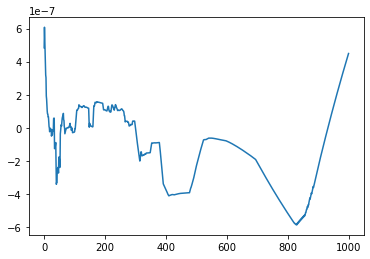

In [4]:
plt.plot(range(len(df_original.iloc[1000:2000,8])), df_original.iloc[1000:2000, 8])

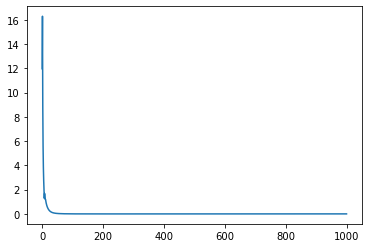

In [5]:
plt.plot(range(len(df_bm.iloc[1000:2000,8])), df_bm.iloc[1000:2000, 8])

In [6]:
gas = ct.Solution('original/base_modified_pt.yaml', 'gas')
surf = ct.Interface('original/base_modified_pt.yaml', 'surface1', [gas])

def compare_trends(ratio, rxn_id, property_id):
    '''
    This function plots the sensitivity change over the catalyst area for models with and without Blowers Masel approximation
    ratio: Carbon/Oxygen input ratio 0.6, 1.0, 1.2, 1.6, 2.0, 2.6 available
    rxn_id: reaction id in the model 0 to 106
    property_id: the id of the descriptor to be plotted
    '''
    f_o = f'original/sens_trends/plot_data/{ratio}/kin_sens_trend_plot{rxn_id}.csv'
    f_b = f'bm/sens_trends/plot_data/{ratio}/kin_sens_trend_plot{rxn_id}.csv'
    df_original = pd.read_csv(f_o)
    df_bm = pd.read_csv(f_b)
    y_or = df_original.iloc[1000:2000, property_id]
    y_bm = df_bm.iloc[1000:2000, property_id]
    plt.figure()
    plt.plot(range(1000, 2000), y_or, label = 'original')
    plt.plot(range(1000, 2000), y_bm, label='BMA')
    print(f'the absolute maximum index in original model is {np.abs(y_or).argmax() + 1000}, value ={y_or[np.abs(y_or).argmax() + 1000]}')
    print(f'the absolute maximum index in BMA model is {np.abs(y_bm).argmax() + 1000}, value ={y_bm[np.abs(y_bm).argmax() + 1000]}')
    descriptor = df_original.columns[property_id]
    plt.xlabel('reactor indices')
    plt.ylabel('sensitivity value')
    plt.title(f'The sensitivity of {descriptor} for reaction {surf.reaction(rxn_id)} comparison at C/O={ratio} between origianl and BMA models on catalyst area')
    plt.legend()
    plt.show()

def compare_sens(ratio, property_id, bm_pos, or_pos, top):
    '''
    This function plots the sensitivity change over the catalyst area for models with and without Blowers Masel approximation
    ratio: Carbon/Oxygen input ratio 0.6, 1.0, 1.2, 1.6, 2.0, 2.6 available
    property_id: the id of the descriptor to be plotted
    bm_pos: postion to compare the sensitvity for Blowers-Masel models
    or_pos: position to compare the sensitivity for original models
    top: top rxns to plot the sensitivity values
    '''
    sens_bm = []
    sens_or = []
    for rxn_id in range(107):
        f_o = f'original/sens_trends/plot_data/{ratio}/kin_sens_trend_plot{rxn_id}.csv'
        f_b = f'bm/sens_trends/plot_data/{ratio}/kin_sens_trend_plot{rxn_id}.csv'
        df_original = pd.read_csv(f_o)
        df_bm = pd.read_csv(f_b)
        y_or = df_original.iloc[or_pos, property_id]
        y_bm = df_bm.iloc[bm_pos, property_id]
        sens_or.append(y_or)
        sens_bm.append(y_bm)
    sens_or = np.array(sens_or)
    sens_bm = np.array(sens_bm)
    title_name = df_bm.columns[property_id]
    sens_values_or = []
    sens_values_bm =[]
    rxn_eqs = []
    # rank sens values based on original model
    order = np.array(np.abs(sens_or)).argsort()
    ranks = np.flip(order)
    for i in ranks[:top]:
        sens_values_or.append(sens_or[i])
        sens_values_bm.append(sens_bm[i])
        rxn_eqs.append(surf.reaction(i).equation)

    plt.rcParams["figure.figsize"] = (20,10)
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.barh(rxn_eqs, sens_values_or)
    plt.title("Original Sensitivity", fontsize=15)
    plt.xlabel('sensitivity value', fontsize=15)
    plt.ylabel('Reactions', fontsize=15)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=15)

    plt.subplot(1, 2, 2) # index 2
    plt.barh(rxn_eqs, sens_values_bm)
    plt.title("BM Sensitvity", fontsize=15)
    plt.xlabel('sensitivity value', fontsize=15)
    plt.ylabel('Reactions', fontsize=15)
    plt.suptitle(f'{title_name} Comparison at C/O input = {ratio}', fontsize=20)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=15)
    plt.tight_layout()
    plt.show()

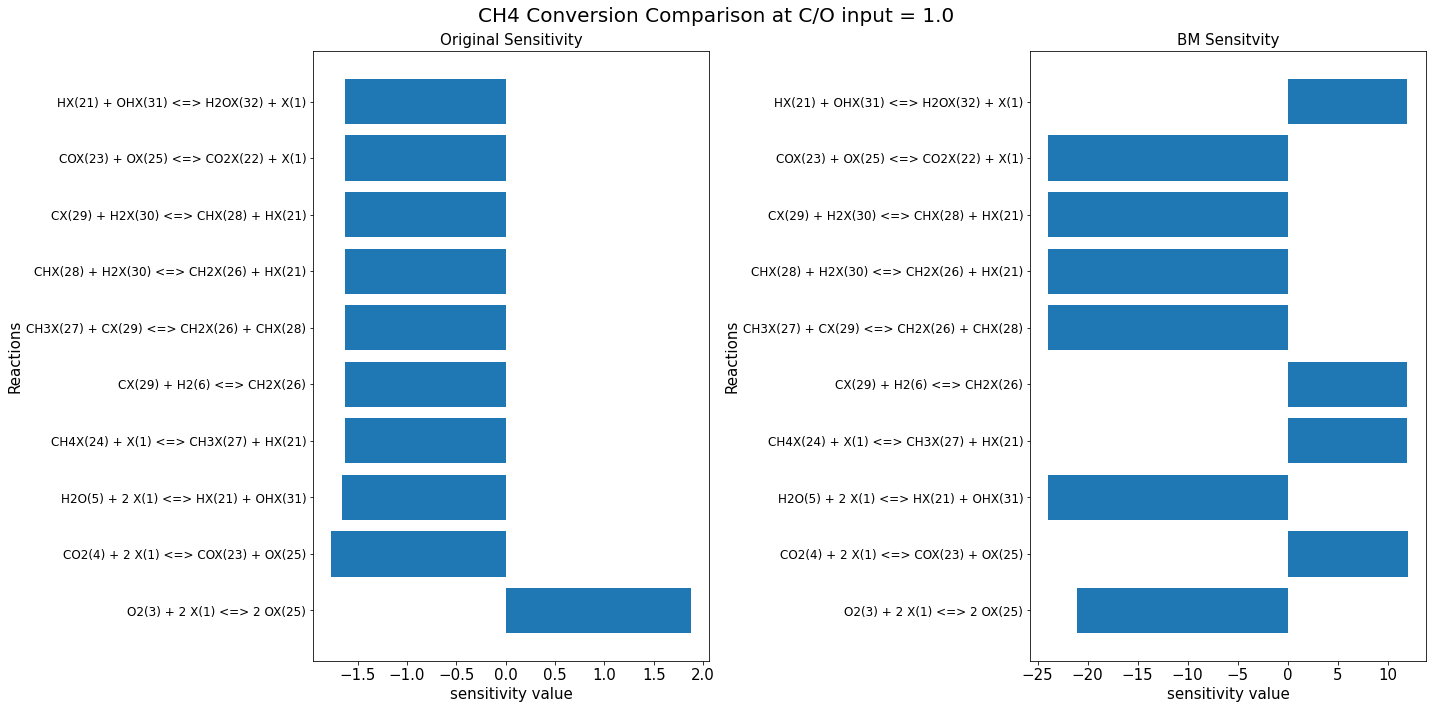

In [10]:
compare_sens(1.0, 8, 1000, 1005, 10)

the absolute maximum index in original model is 1000, value =-0.7669080653641117
the absolute maximum index in BMA model is 1000, value =-24.662797287353467


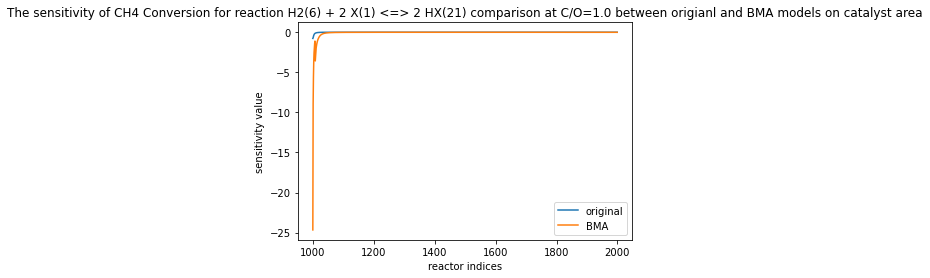

the absolute maximum index in original model is 1828, value =-5.763759959201908e-07
the absolute maximum index in BMA model is 1000, value =-23.91936679096581


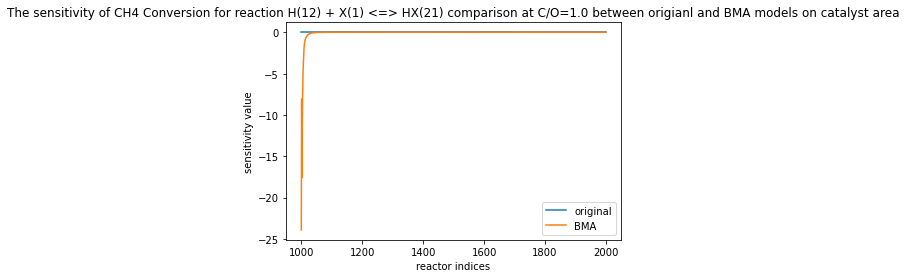

the absolute maximum index in original model is 1002, value =-4.2369821920548905
the absolute maximum index in BMA model is 1001, value =16.287138077538405


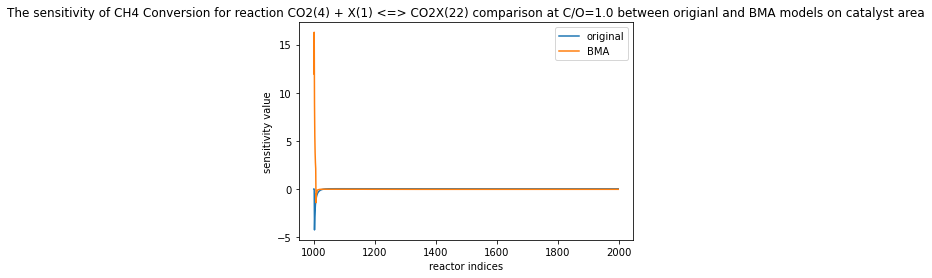

the absolute maximum index in original model is 1000, value =0.06605121999958916
the absolute maximum index in BMA model is 1001, value =16.345857702527784


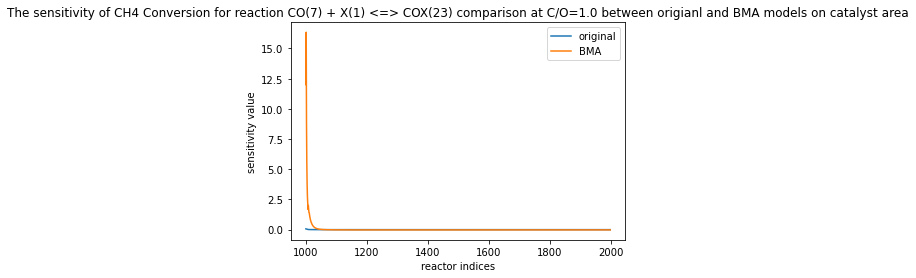

the absolute maximum index in original model is 1001, value =3.062254810391342
the absolute maximum index in BMA model is 1000, value =-21.094819257976948


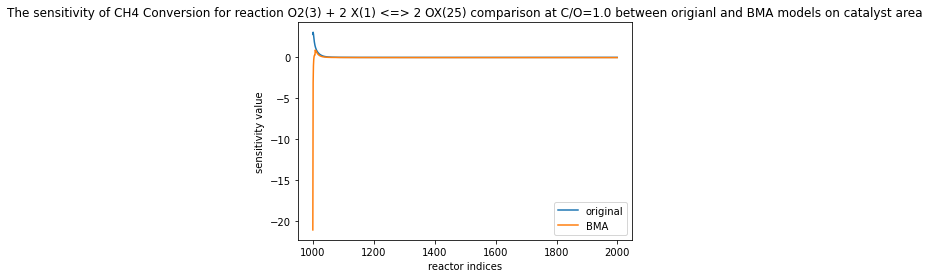

the absolute maximum index in original model is 1002, value =-4.224380545296162
the absolute maximum index in BMA model is 1000, value =-23.919359281800226


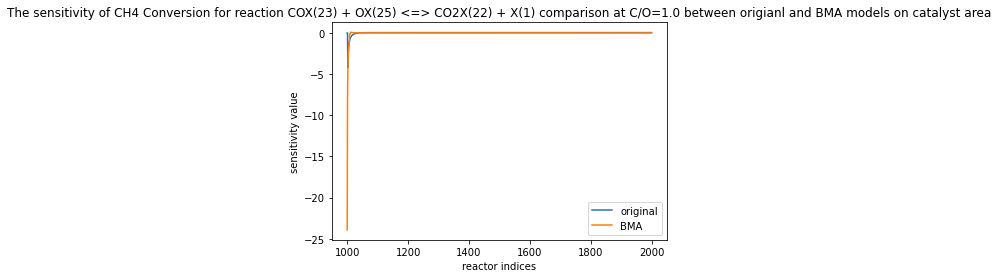

the absolute maximum index in original model is 1006, value =-1.3441497514364686e-05
the absolute maximum index in BMA model is 1000, value =-23.919367985603447


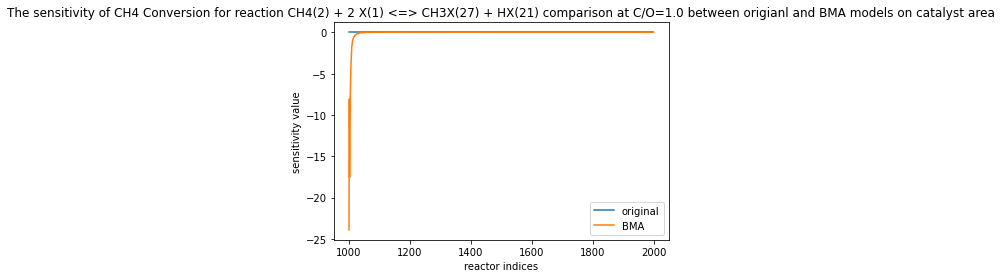

the absolute maximum index in original model is 1000, value =-0.16180695498975195
the absolute maximum index in BMA model is 1000, value =11.858452215877046


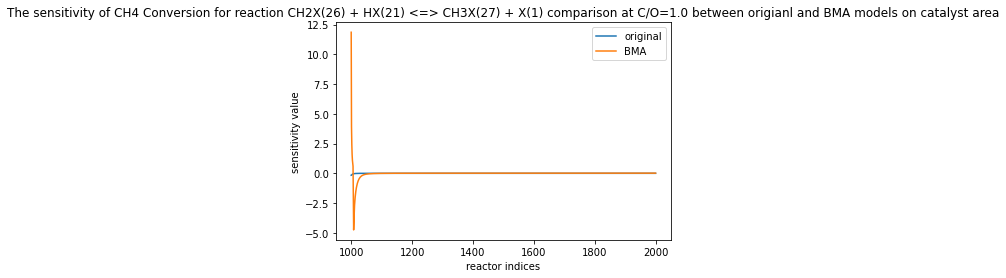

the absolute maximum index in original model is 1016, value =-9.090374250474724e-07
the absolute maximum index in BMA model is 1000, value =-23.919366794799643


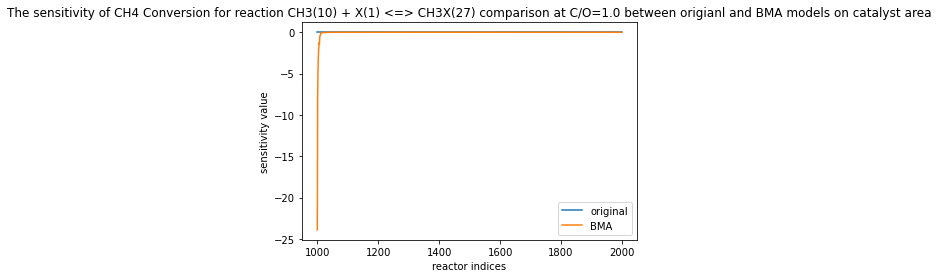

the absolute maximum index in original model is 1000, value =-0.001522892521248808
the absolute maximum index in BMA model is 1000, value =-23.920476783752445


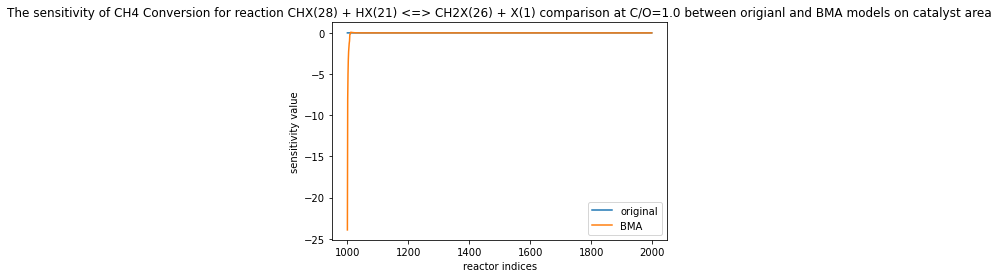

the absolute maximum index in original model is 1006, value =0.06823753882835988
the absolute maximum index in BMA model is 1000, value =11.957179249340566


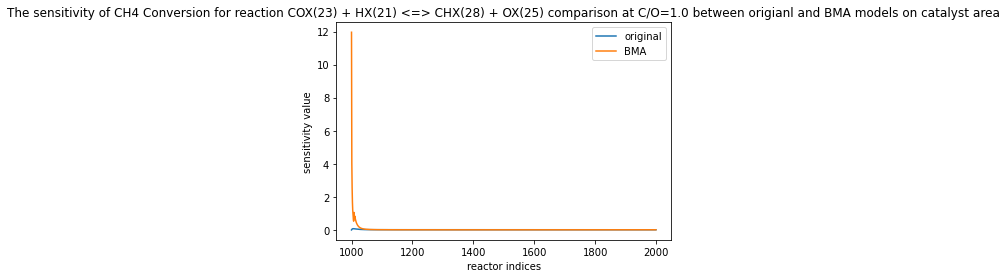

the absolute maximum index in original model is 1002, value =-4.123568750261029
the absolute maximum index in BMA model is 1000, value =-24.005757127206785


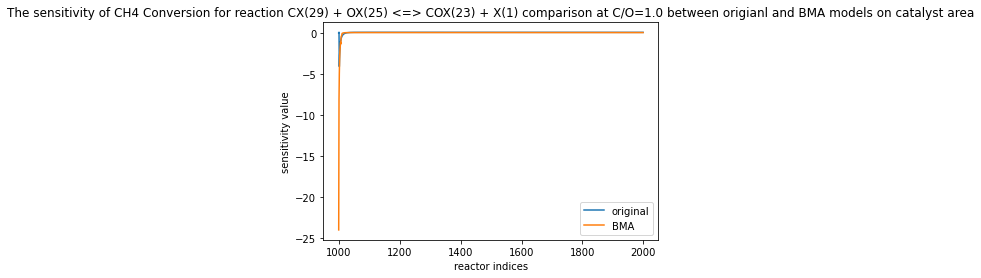

the absolute maximum index in original model is 1000, value =-1.4358709098093918e-06
the absolute maximum index in BMA model is 1001, value =16.290091808635193


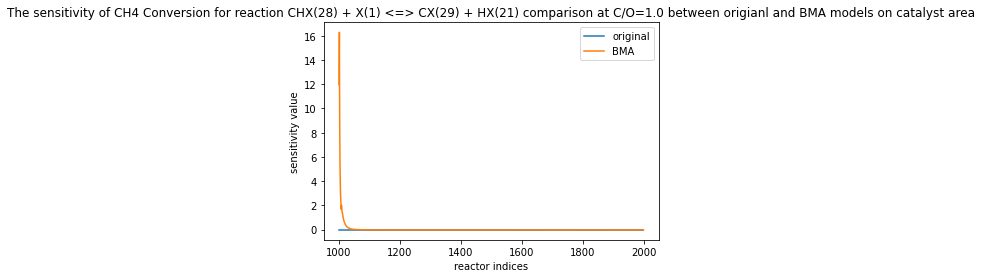

the absolute maximum index in original model is 1002, value =-4.224636290392727
the absolute maximum index in BMA model is 1001, value =16.288960938585685


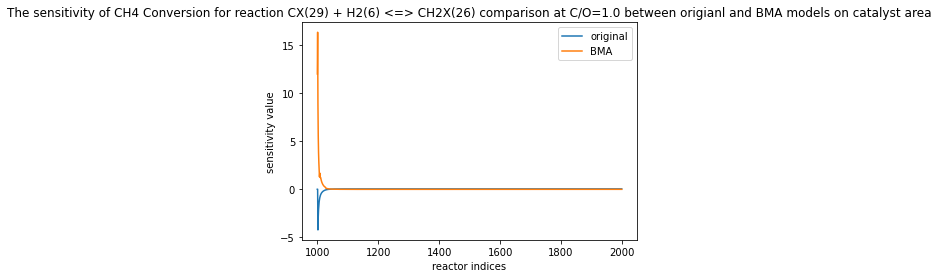

the absolute maximum index in original model is 1002, value =-4.19274710753271
the absolute maximum index in BMA model is 1001, value =16.304358381725418


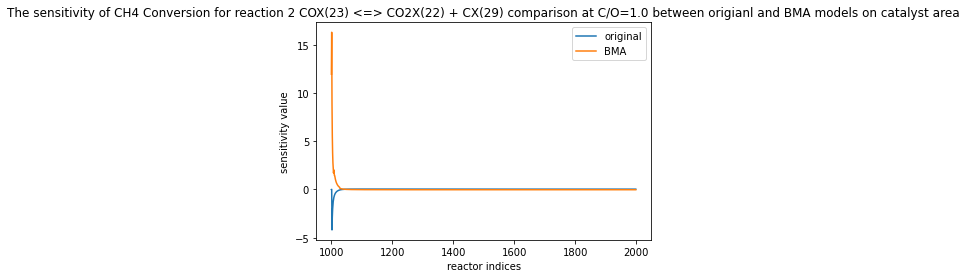

the absolute maximum index in original model is 1002, value =-1.5643256151358015e-06
the absolute maximum index in BMA model is 1000, value =-23.91936740869226


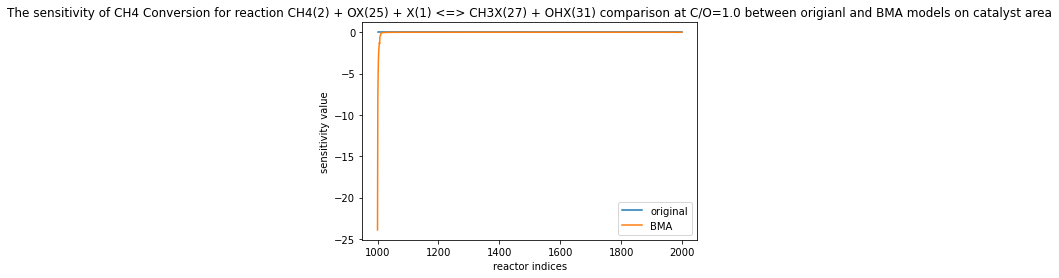

the absolute maximum index in original model is 1002, value =0.06630657082190043
the absolute maximum index in BMA model is 1001, value =16.34209323701974


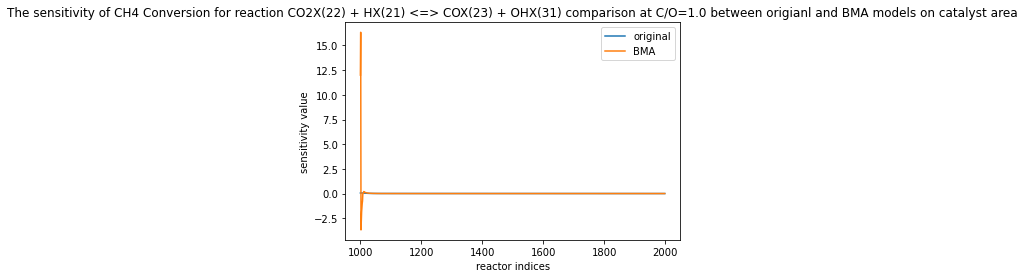

the absolute maximum index in original model is 1004, value =-0.06280040616483544
the absolute maximum index in BMA model is 1000, value =-22.581839120126137


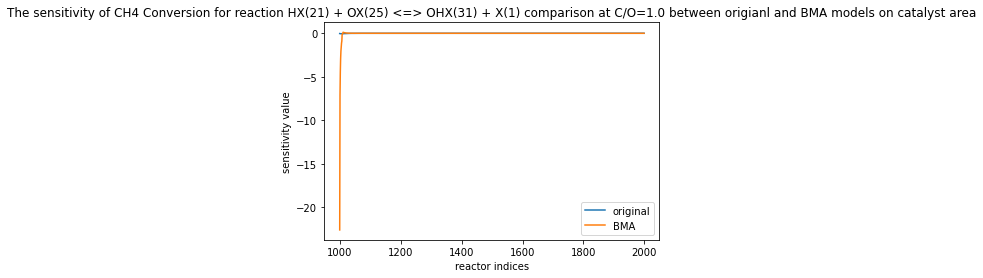

the absolute maximum index in original model is 1828, value =-6.40487113436277e-07
the absolute maximum index in BMA model is 1001, value =16.290090898132874


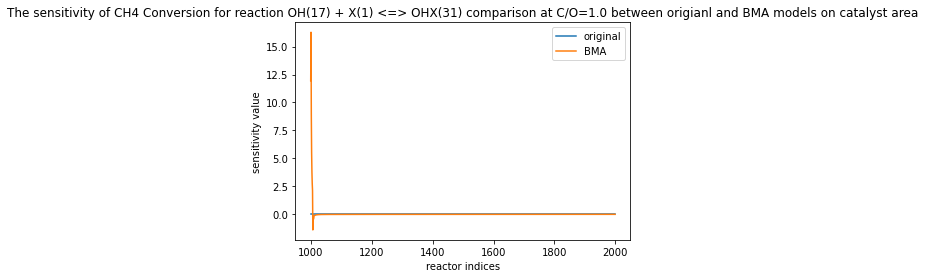

the absolute maximum index in original model is 1828, value =-6.41979895968661e-07
the absolute maximum index in BMA model is 1000, value =47.83872791069511


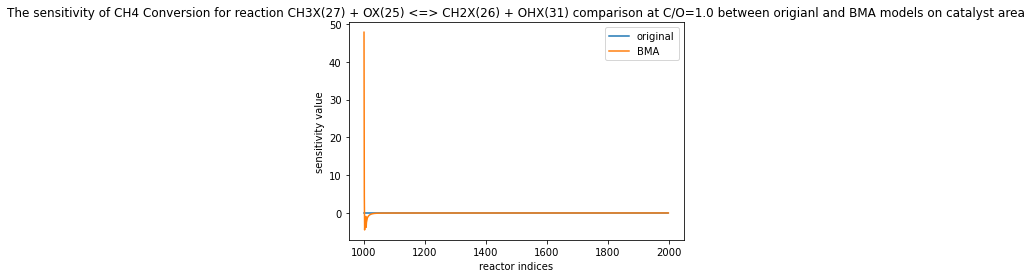

the absolute maximum index in original model is 1828, value =-6.370554721655215e-07
the absolute maximum index in BMA model is 1000, value =-23.919366801667298


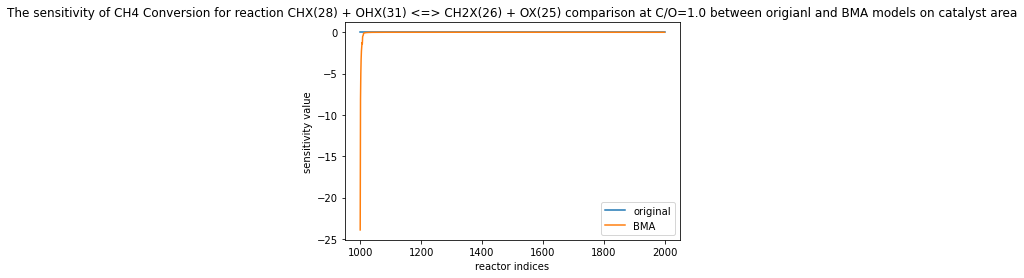

the absolute maximum index in original model is 1828, value =-6.465754607574164e-07
the absolute maximum index in BMA model is 1001, value =16.290093079252163


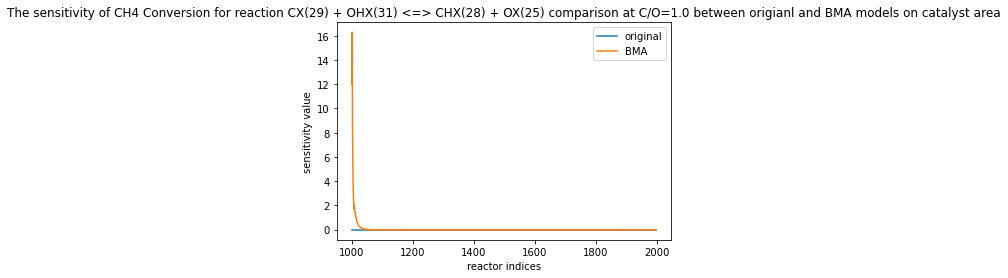

the absolute maximum index in original model is 1002, value =-4.2239156229519645
the absolute maximum index in BMA model is 1000, value =-23.91949799184188


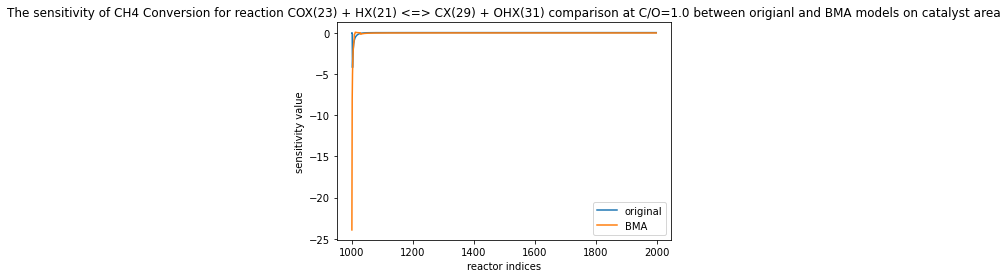

the absolute maximum index in original model is 1003, value =-1.8790238956469097e-06
the absolute maximum index in BMA model is 1001, value =16.29008462134573


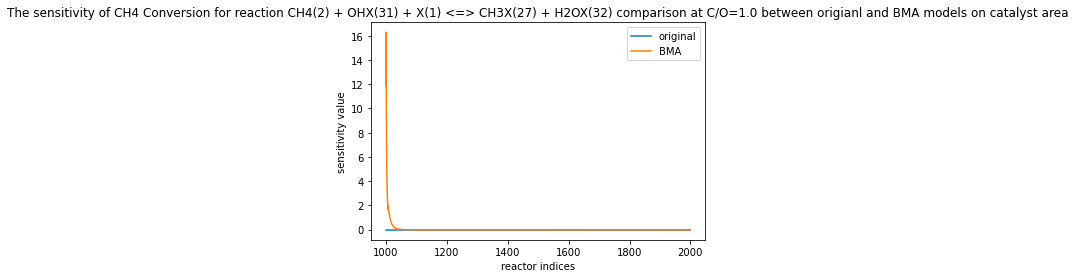

the absolute maximum index in original model is 1016, value =-2.206800894230661e-06
the absolute maximum index in BMA model is 1001, value =16.290092994265066


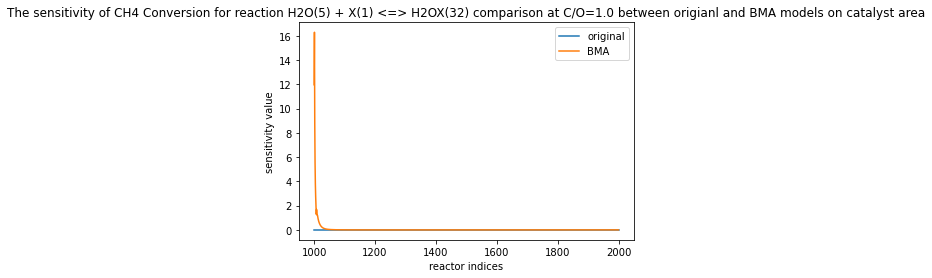

the absolute maximum index in original model is 1828, value =-6.3138650322258e-07
the absolute maximum index in BMA model is 1000, value =-23.919366838431767


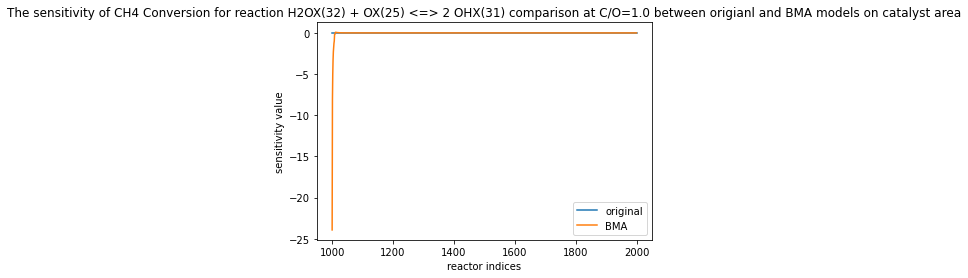

the absolute maximum index in original model is 1002, value =-4.22437948813968
the absolute maximum index in BMA model is 1001, value =16.29008704264424


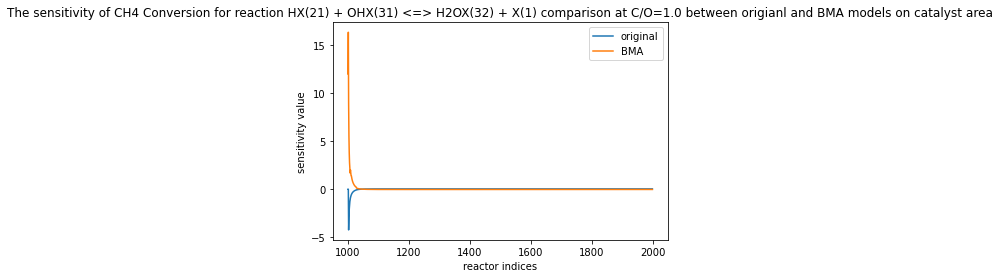

the absolute maximum index in original model is 1001, value =-2.868647351382352e-06
the absolute maximum index in BMA model is 1001, value =16.290088459032628


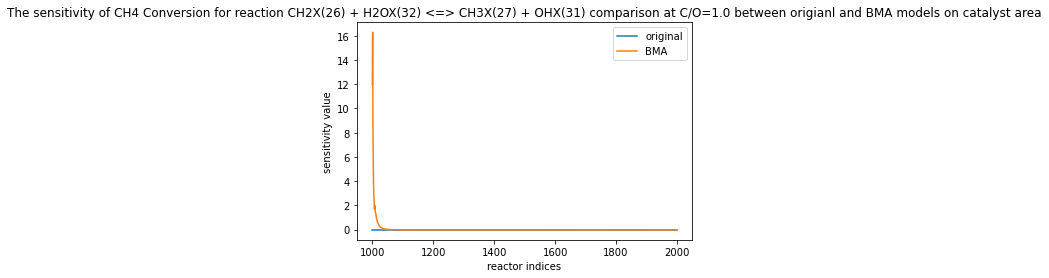

the absolute maximum index in original model is 1011, value =-6.765294796454145e-05
the absolute maximum index in BMA model is 1000, value =-23.919387067754432


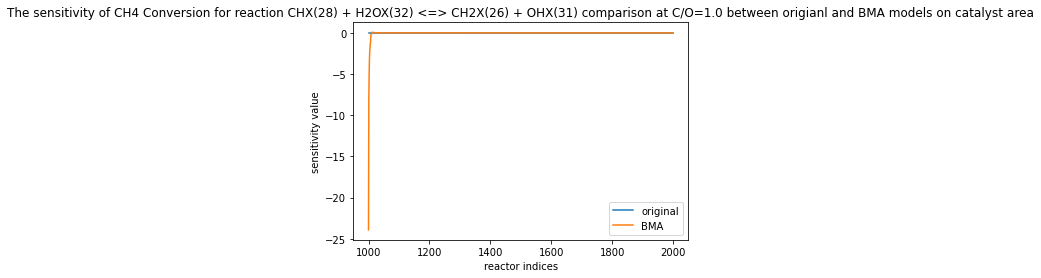

the absolute maximum index in original model is 1008, value =-0.045968828624897866
the absolute maximum index in BMA model is 1001, value =16.25213513416199


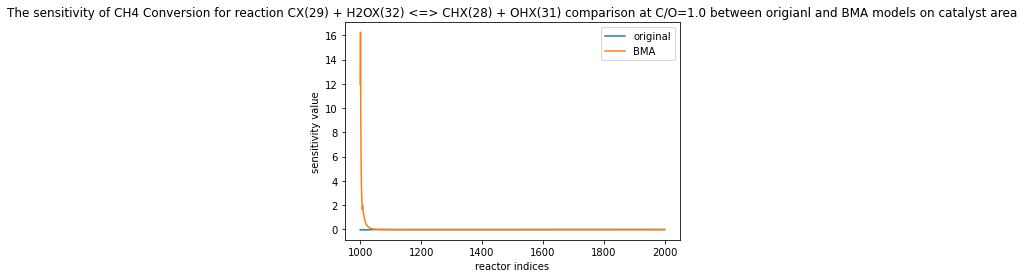

the absolute maximum index in original model is 1002, value =-4.224378776683825
the absolute maximum index in BMA model is 1000, value =-23.919366812247528


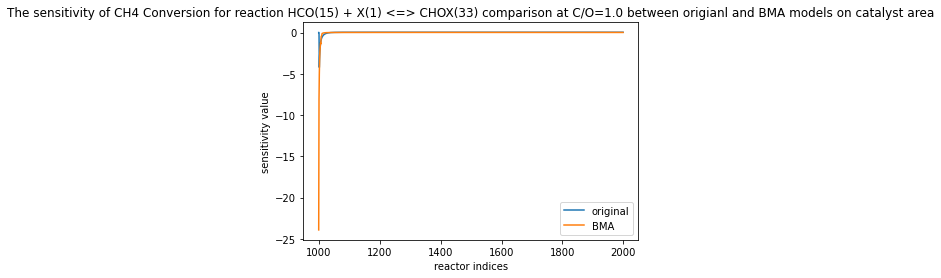

the absolute maximum index in original model is 1000, value =-1.5613150950069203e-06
the absolute maximum index in BMA model is 1000, value =-23.91936756150721


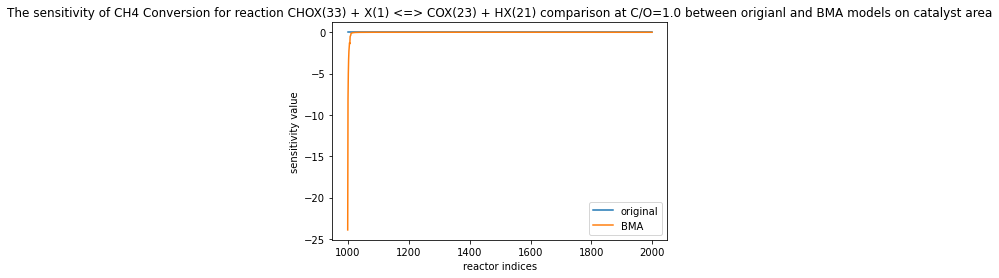

the absolute maximum index in original model is 1002, value =-1.151899039783614
the absolute maximum index in BMA model is 1000, value =-24.93451972793004


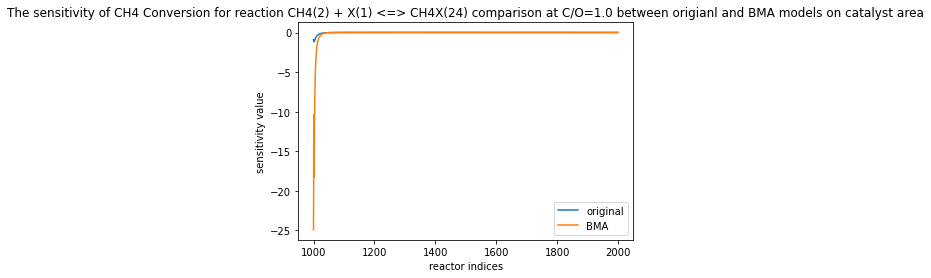

the absolute maximum index in original model is 1007, value =3.206688070132042e-06
the absolute maximum index in BMA model is 1000, value =11.959681552465547


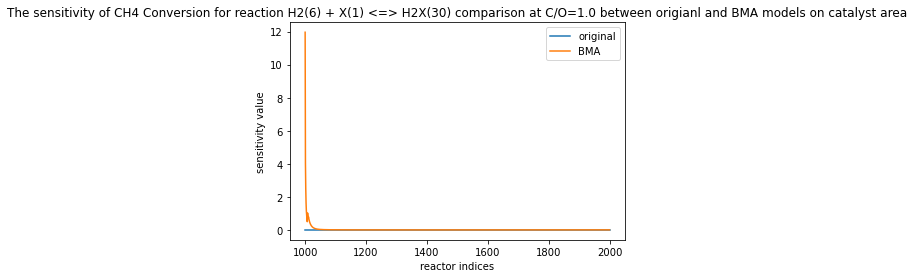

the absolute maximum index in original model is 1002, value =-4.325242634154495
the absolute maximum index in BMA model is 1001, value =-19.744690031845586


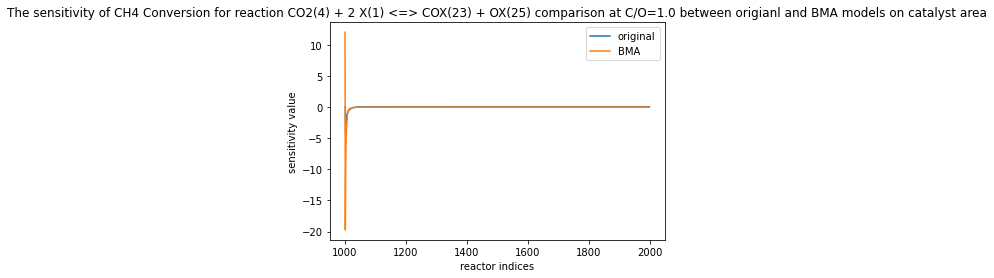

the absolute maximum index in original model is 1002, value =-4.2417467258388815
the absolute maximum index in BMA model is 1000, value =-23.935929340042936


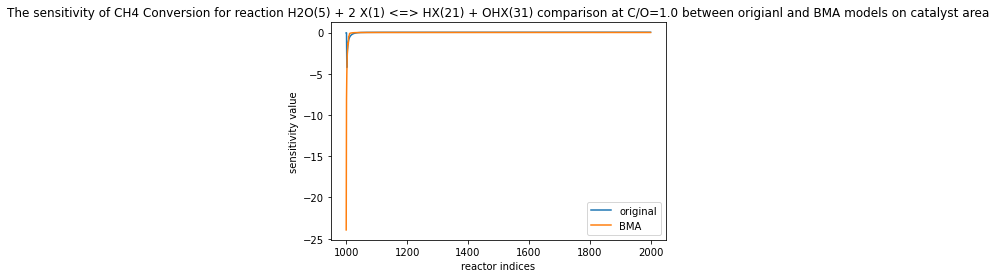

the absolute maximum index in original model is 1000, value =0.0002513500578950883
the absolute maximum index in BMA model is 1000, value =-23.91930402419677


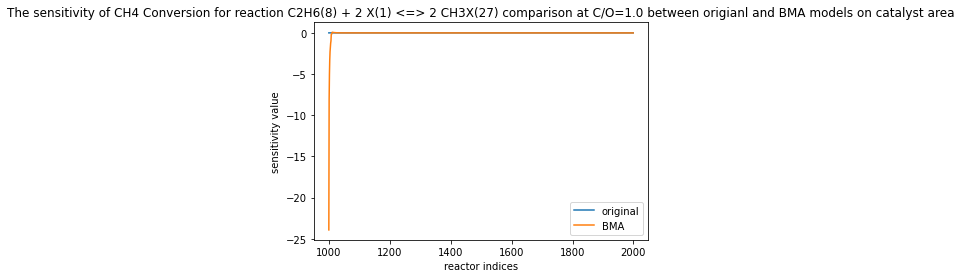

the absolute maximum index in original model is 1828, value =-6.377269651373511e-07
the absolute maximum index in BMA model is 1000, value =-23.919366905506845


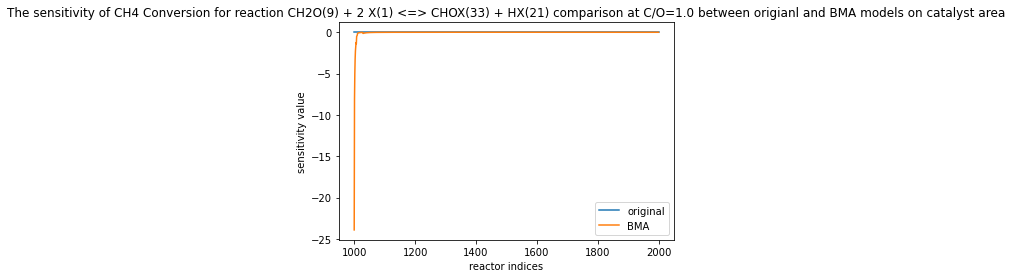

the absolute maximum index in original model is 1002, value =-4.224365955675885
the absolute maximum index in BMA model is 1000, value =-23.91936392445412


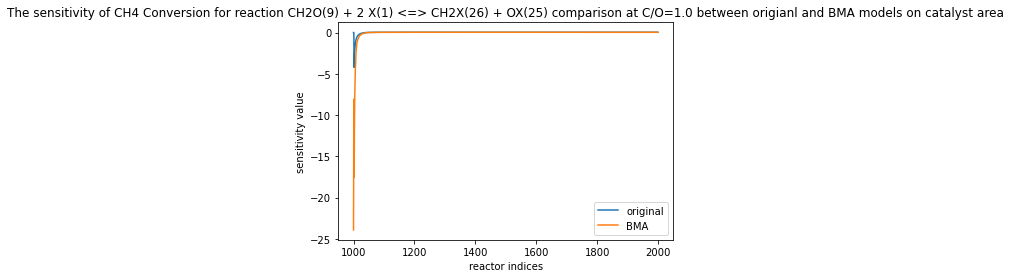

the absolute maximum index in original model is 1004, value =3.250748221877874e-06
the absolute maximum index in BMA model is 1000, value =-23.919366334566533


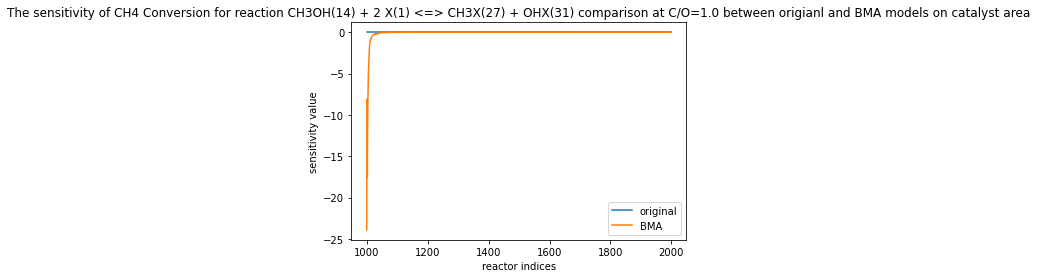

the absolute maximum index in original model is 1828, value =-6.367162346072671e-07
the absolute maximum index in BMA model is 1000, value =-23.919366827811185


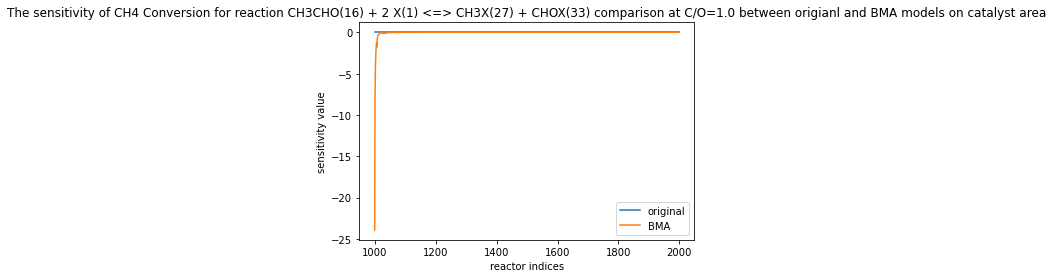

the absolute maximum index in original model is 1002, value =-4.224377548154226
the absolute maximum index in BMA model is 1000, value =11.959683576082046


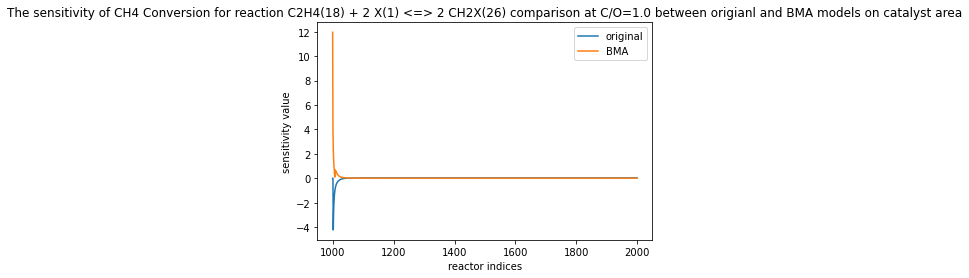

the absolute maximum index in original model is 1002, value =-4.224917589648925
the absolute maximum index in BMA model is 1001, value =16.283988964125335


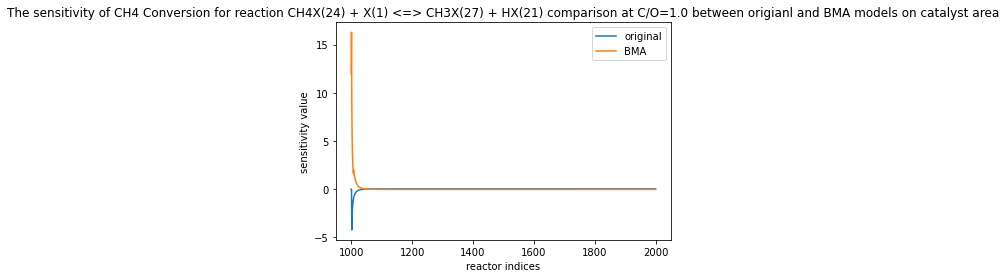

the absolute maximum index in original model is 1000, value =-1.6764709792129075e-05
the absolute maximum index in BMA model is 1001, value =16.290085373823267


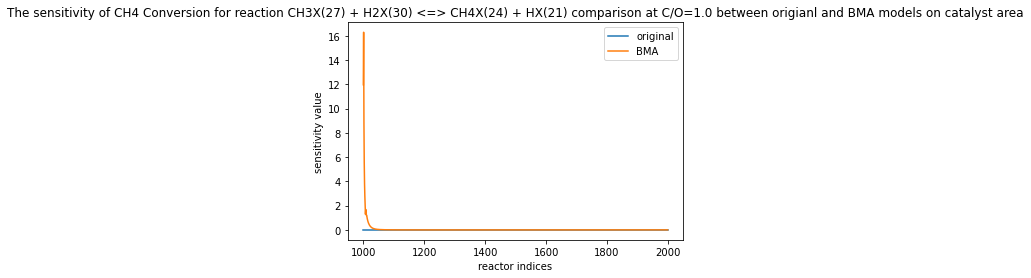

the absolute maximum index in original model is 1002, value =-4.224381080105712
the absolute maximum index in BMA model is 1000, value =-23.919381126329675


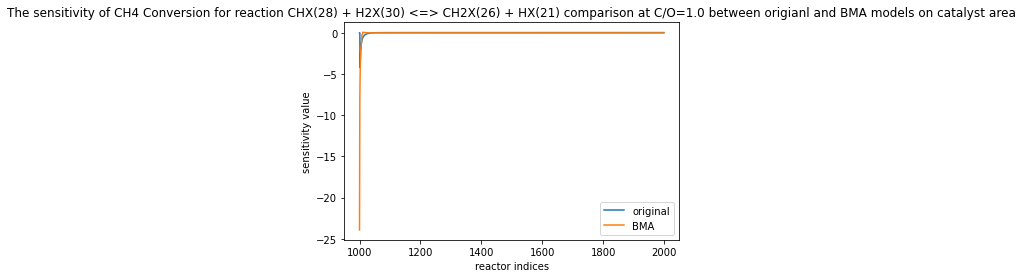

the absolute maximum index in original model is 1828, value =-6.36723796624979e-07
the absolute maximum index in BMA model is 1001, value =16.29009307836304


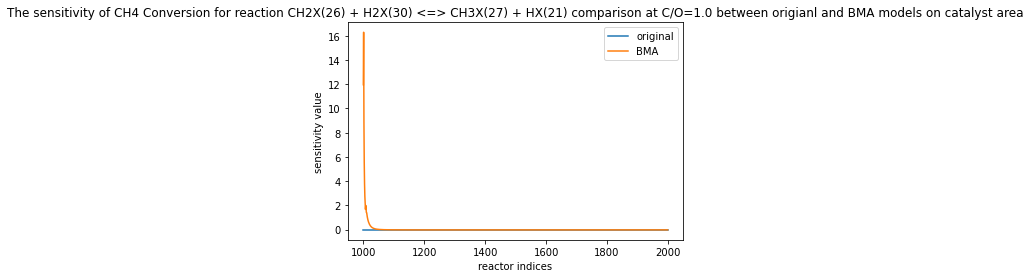

the absolute maximum index in original model is 1002, value =-4.224379372574703
the absolute maximum index in BMA model is 1000, value =-23.91936899859644


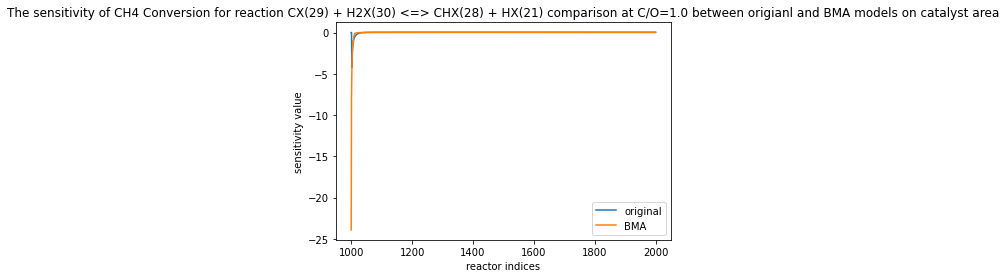

the absolute maximum index in original model is 1019, value =-1.848564667378709e-05
the absolute maximum index in BMA model is 1000, value =-23.91936675544115


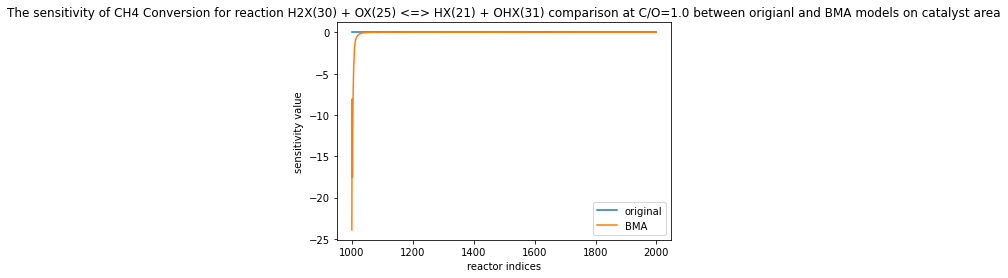

the absolute maximum index in original model is 1828, value =-7.092271798599997e-07
the absolute maximum index in BMA model is 1000, value =-23.91936690982613


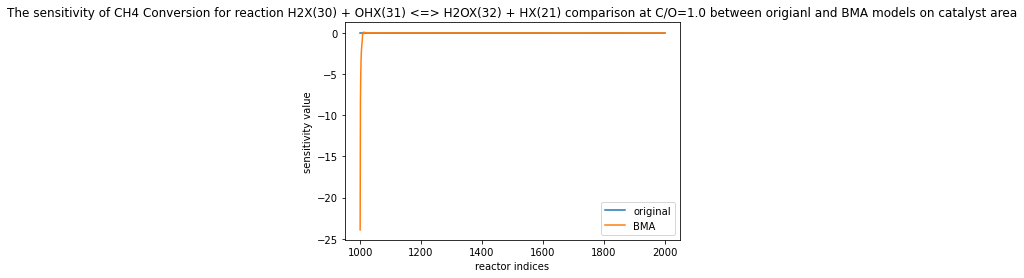

the absolute maximum index in original model is 1001, value =-2.7486335521773394e-05
the absolute maximum index in BMA model is 1000, value =-23.91940096775914


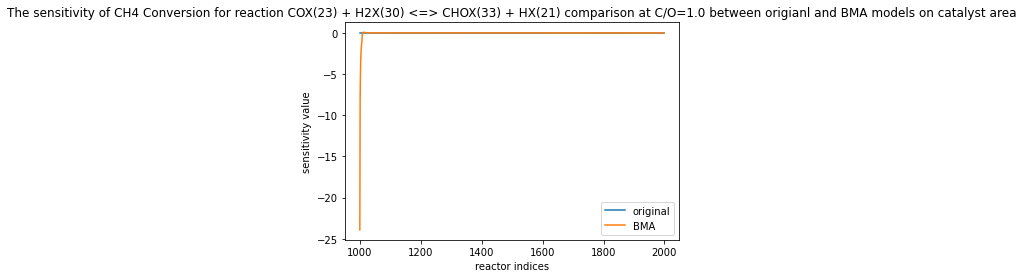

the absolute maximum index in original model is 1828, value =-6.466072235986345e-07
the absolute maximum index in BMA model is 1000, value =-23.91936689368281


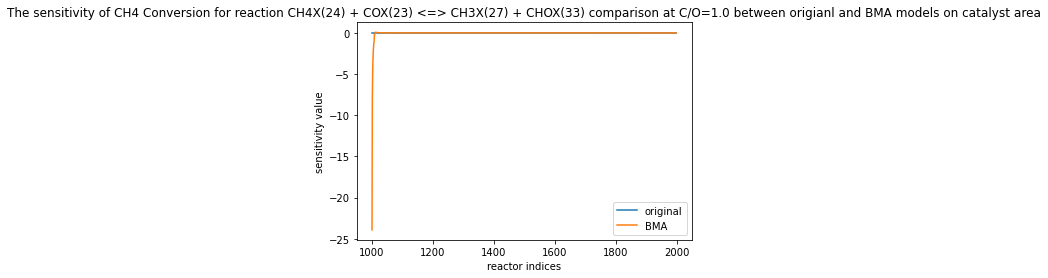

the absolute maximum index in original model is 1000, value =-1.2154304098059427e-06
the absolute maximum index in BMA model is 1001, value =16.29009236417615


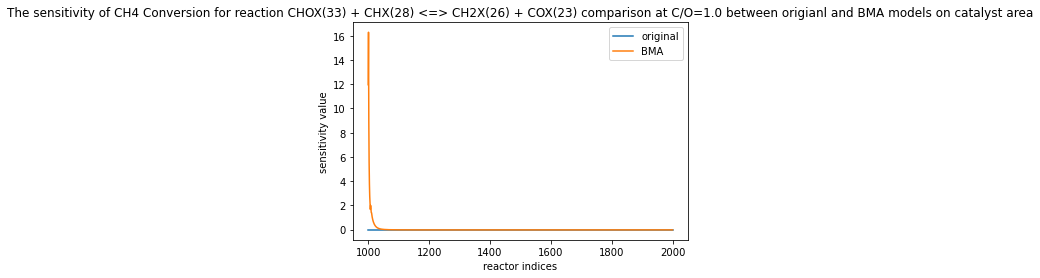

the absolute maximum index in original model is 1828, value =-6.396591257504882e-07
the absolute maximum index in BMA model is 1001, value =16.29009221060622


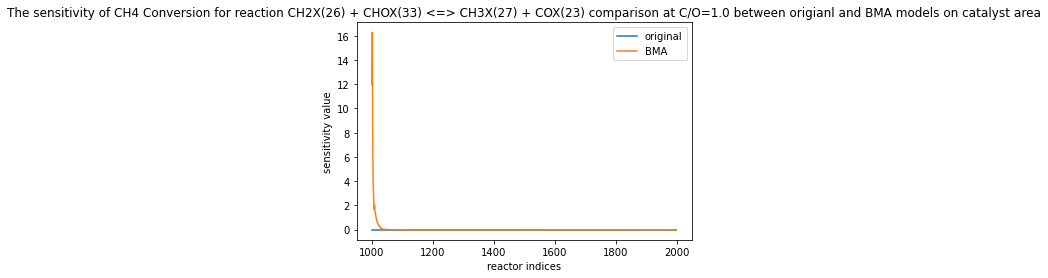

the absolute maximum index in original model is 1828, value =-6.442857670001373e-07
the absolute maximum index in BMA model is 1000, value =-23.919366817577142


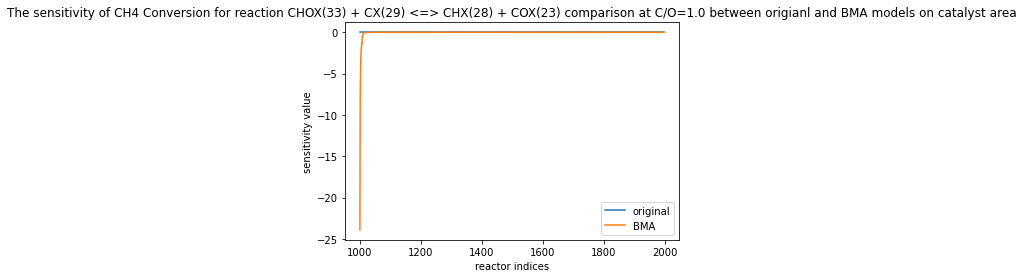

the absolute maximum index in original model is 1003, value =-8.924360359547705e-05
the absolute maximum index in BMA model is 1000, value =-23.91937183104593


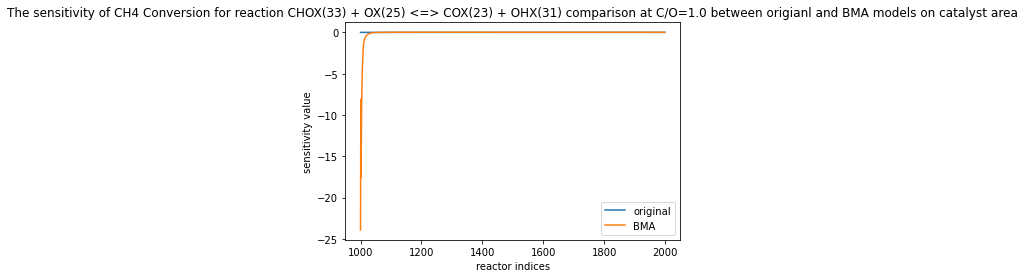

the absolute maximum index in original model is 1002, value =-4.224378692407178
the absolute maximum index in BMA model is 1000, value =-23.919366844018835


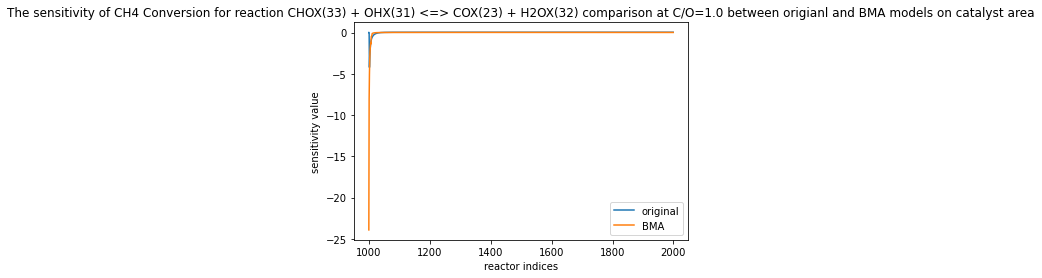

the absolute maximum index in original model is 1009, value =-0.023005752461607208
the absolute maximum index in BMA model is 1001, value =16.28764632354177


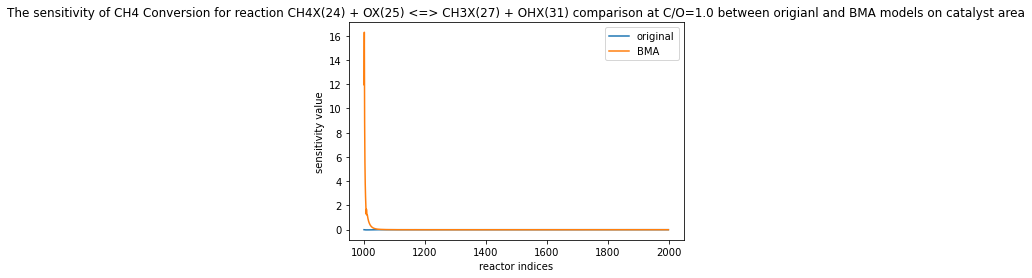

the absolute maximum index in original model is 1828, value =-6.348746761969487e-07
the absolute maximum index in BMA model is 1001, value =16.290092872388293


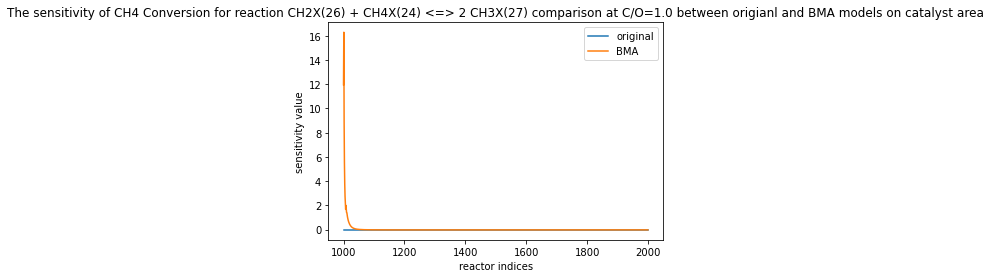

the absolute maximum index in original model is 1828, value =-6.423041751695012e-07
the absolute maximum index in BMA model is 1000, value =-23.91936683608521


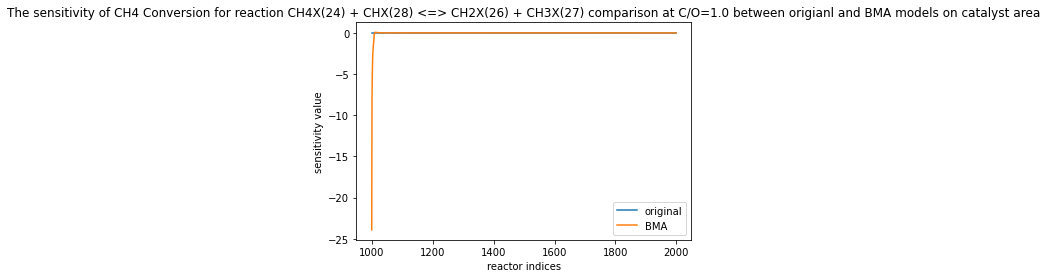

the absolute maximum index in original model is 1828, value =-6.373976090889392e-07
the absolute maximum index in BMA model is 1000, value =-23.919366824302035


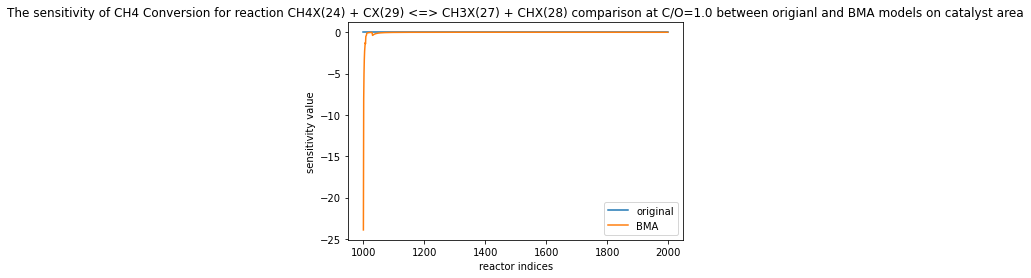

the absolute maximum index in original model is 1000, value =-2.502853823193606e-06
the absolute maximum index in BMA model is 1000, value =-23.919370670471825


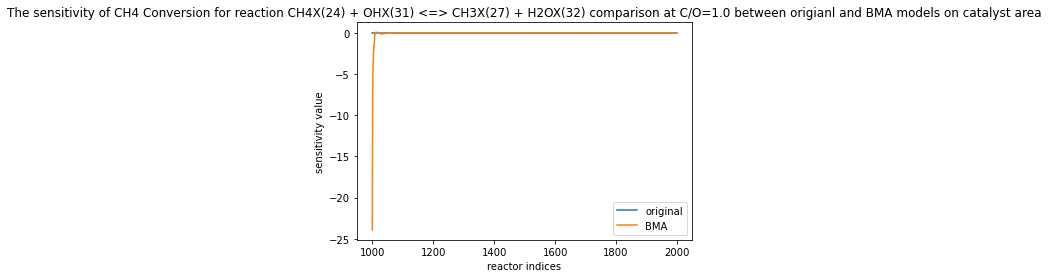

the absolute maximum index in original model is 1001, value =-1.1555574130287466e-06
the absolute maximum index in BMA model is 1000, value =-22.569190183893205


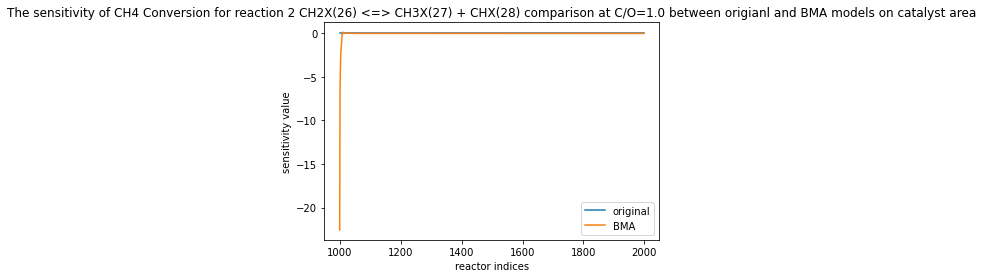

the absolute maximum index in original model is 1002, value =-4.224423365242082
the absolute maximum index in BMA model is 1000, value =-23.91954498295401


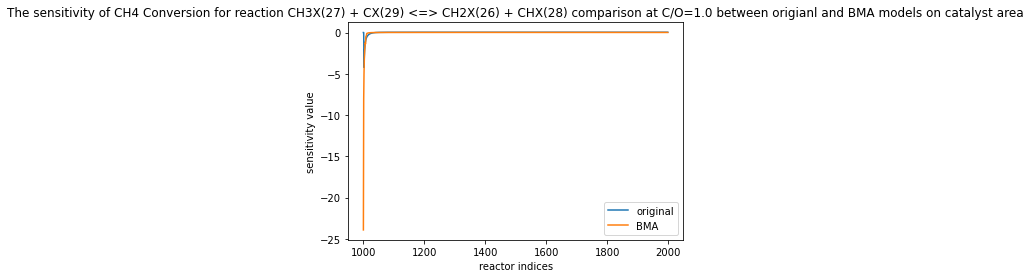

the absolute maximum index in original model is 1828, value =-6.515927234165004e-07
the absolute maximum index in BMA model is 1000, value =-23.91936681576736


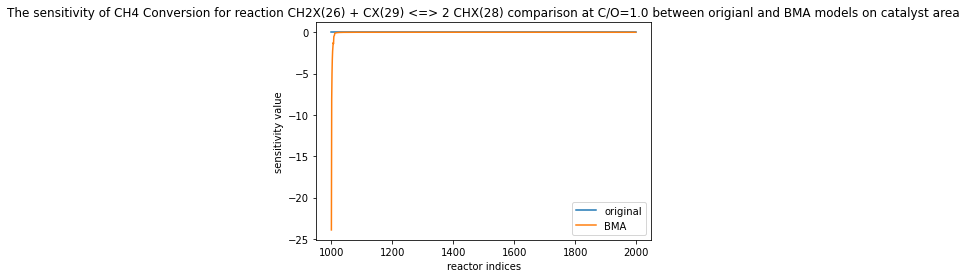

the absolute maximum index in original model is 1828, value =-6.333080841114065e-07
the absolute maximum index in BMA model is 1001, value =-19.78939111274958


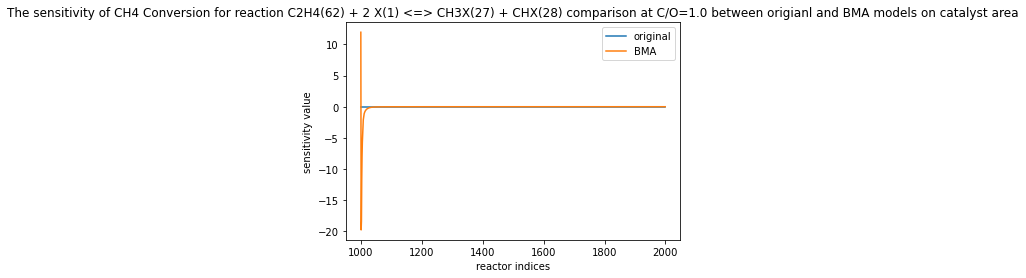

the absolute maximum index in original model is 1002, value =-4.224378892071086
the absolute maximum index in BMA model is 1000, value =-23.91936664813975


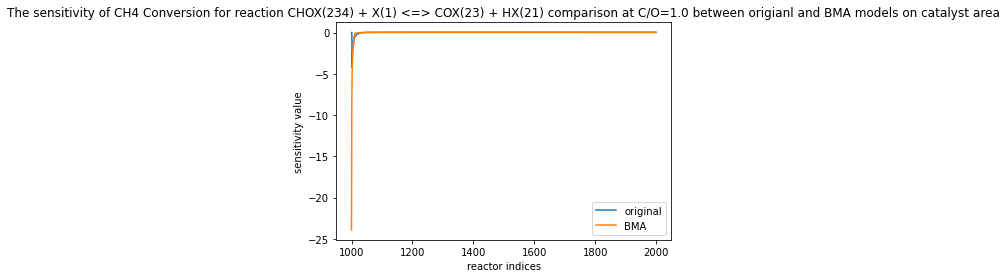

the absolute maximum index in original model is 1013, value =0.0005941628383153262
the absolute maximum index in BMA model is 1000, value =-23.919375048275608


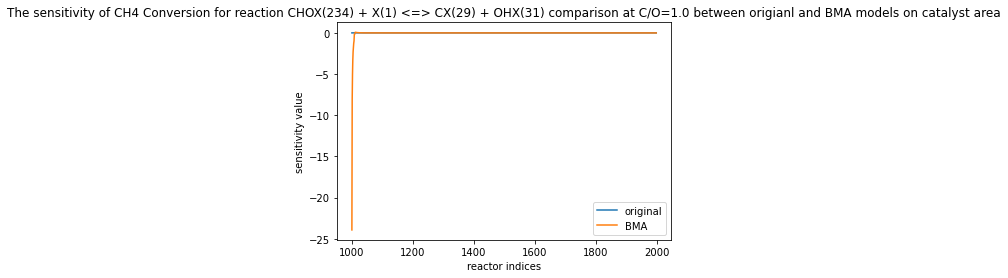

the absolute maximum index in original model is 1255, value =7.089032647986549e-06
the absolute maximum index in BMA model is 1000, value =-23.919366817201425


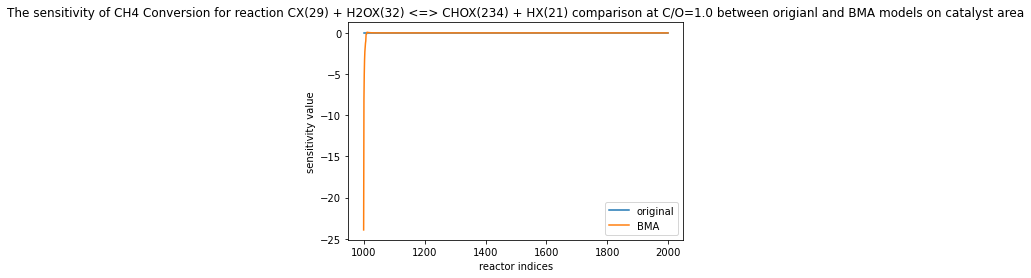

the absolute maximum index in original model is 1999, value =5.374853986961359e-07
the absolute maximum index in BMA model is 1000, value =-23.919366805947504


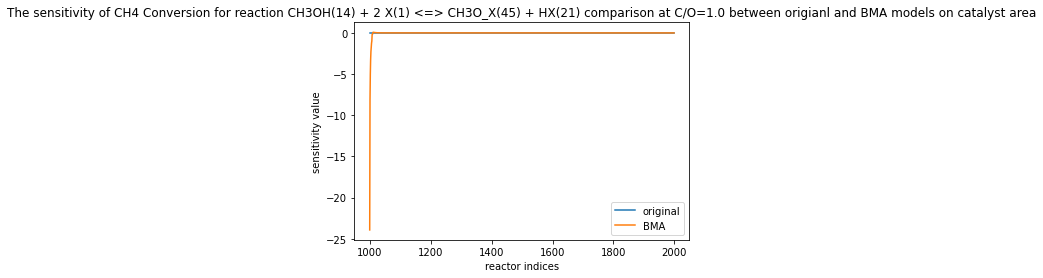

the absolute maximum index in original model is 1828, value =-5.545579772124669e-07
the absolute maximum index in BMA model is 1001, value =16.29009313961206


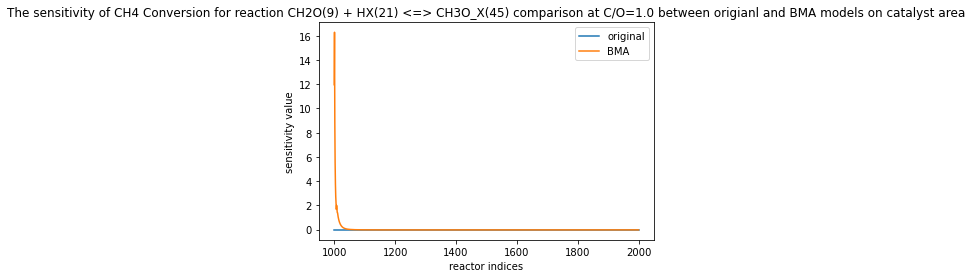

the absolute maximum index in original model is 1002, value =-4.224374117132936
the absolute maximum index in BMA model is 1000, value =-23.919368765821556


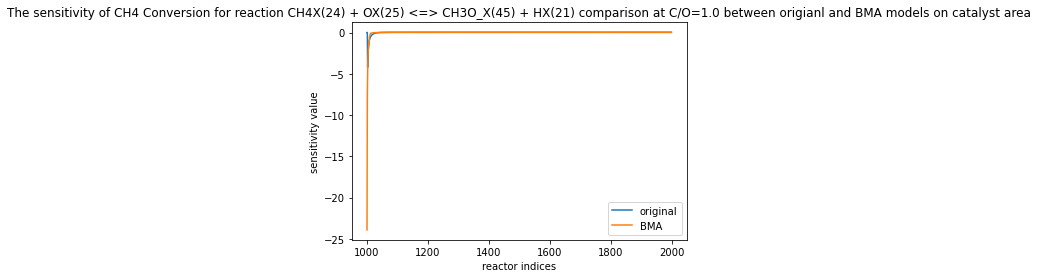

the absolute maximum index in original model is 1828, value =-5.516848601794625e-07
the absolute maximum index in BMA model is 1000, value =-23.919366827108025


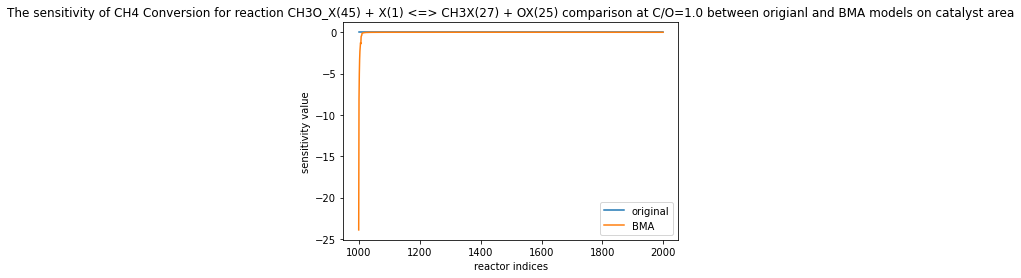

the absolute maximum index in original model is 1828, value =-5.728490542916378e-07
the absolute maximum index in BMA model is 1000, value =-23.91936682406243


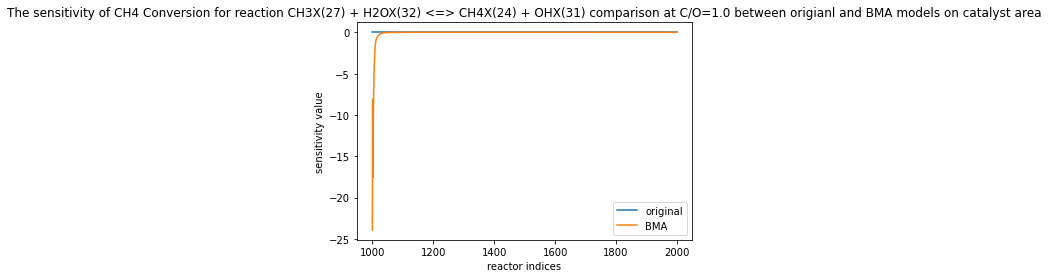

the absolute maximum index in original model is 1828, value =-5.620637709083174e-07
the absolute maximum index in BMA model is 1001, value =16.290093087786087


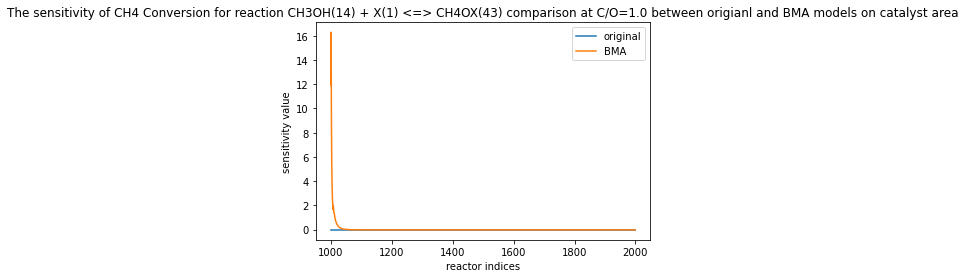

the absolute maximum index in original model is 1004, value =7.403218947618007e-07
the absolute maximum index in BMA model is 1000, value =-23.91936631324379


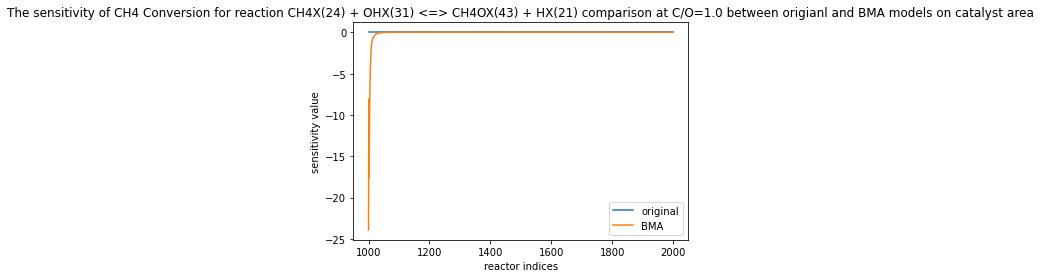

the absolute maximum index in original model is 1828, value =-5.591955177083015e-07
the absolute maximum index in BMA model is 1001, value =16.290090455278445


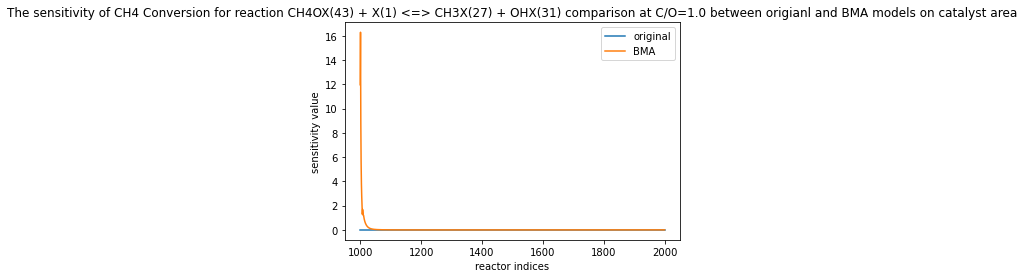

the absolute maximum index in original model is 1828, value =-5.60741944413279e-07
the absolute maximum index in BMA model is 1000, value =11.959683380799664


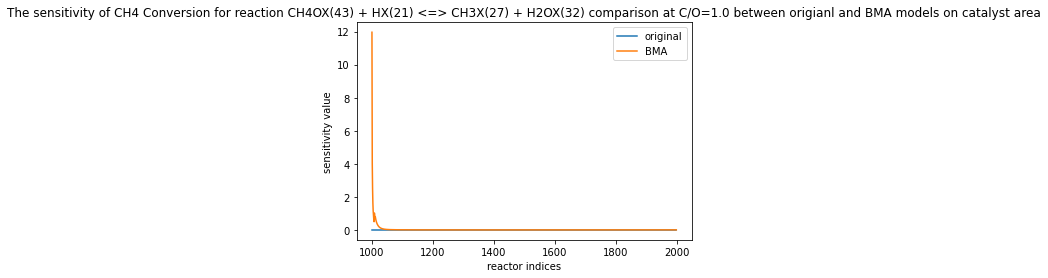

the absolute maximum index in original model is 1828, value =-5.624726168987791e-07
the absolute maximum index in BMA model is 1000, value =-22.568965683962016


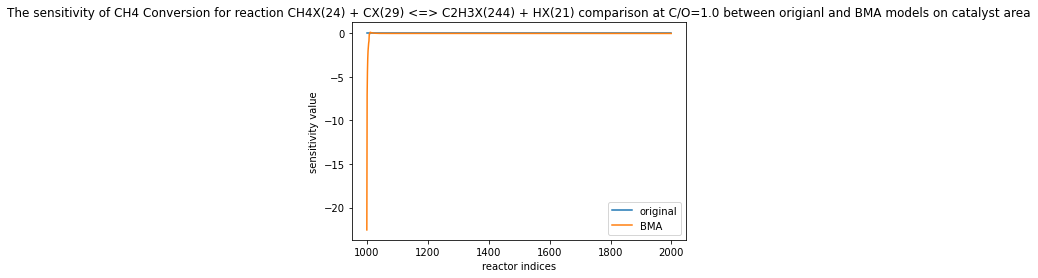

the absolute maximum index in original model is 1828, value =-5.654899093023345e-07
the absolute maximum index in BMA model is 1000, value =-23.9193667946038


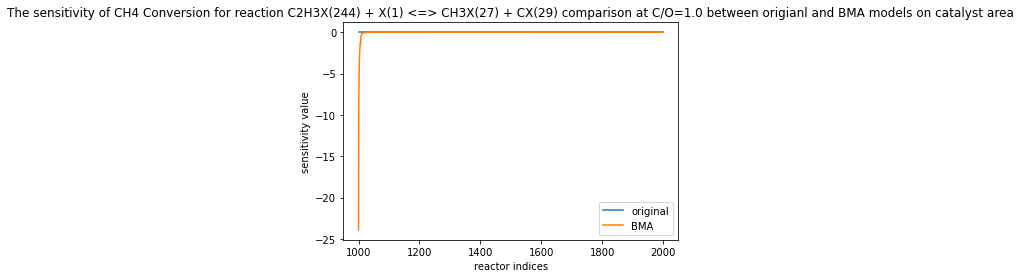

the absolute maximum index in original model is 1002, value =-4.2243787829788415
the absolute maximum index in BMA model is 1000, value =-23.919366860562548


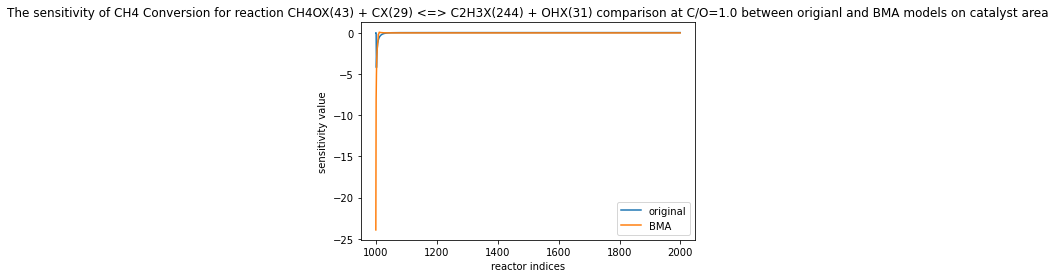

the absolute maximum index in original model is 1828, value =-5.690866842118215e-07
the absolute maximum index in BMA model is 1000, value =-23.91936681109056


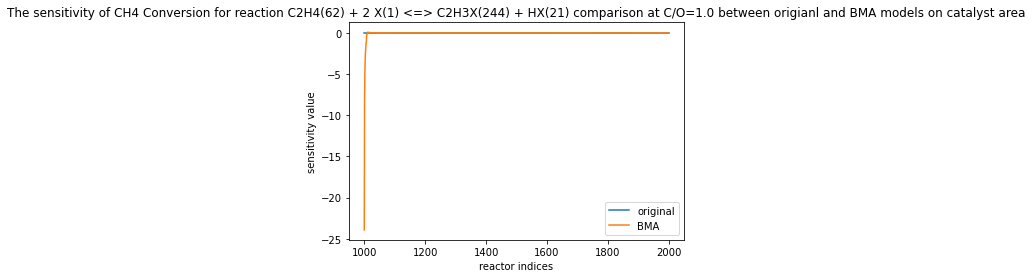

the absolute maximum index in original model is 1828, value =-5.471323835072773e-07
the absolute maximum index in BMA model is 1000, value =47.83872931184104


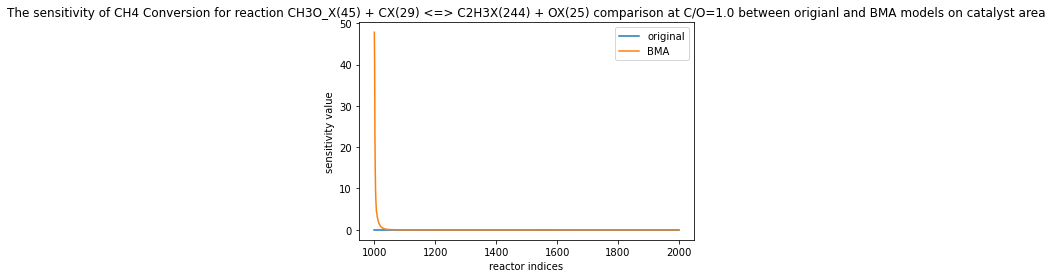

the absolute maximum index in original model is 1000, value =-6.444405563953832e-06
the absolute maximum index in BMA model is 1000, value =-23.919369729916873


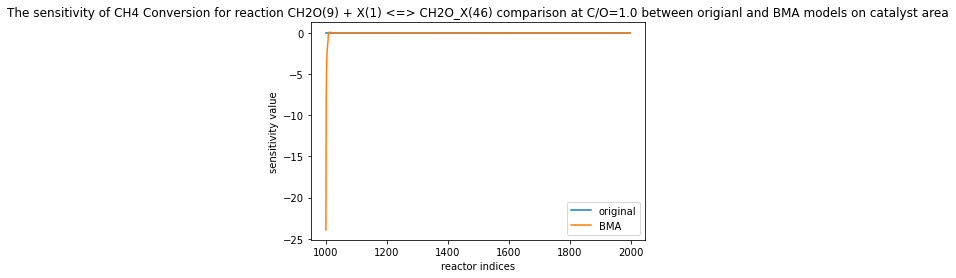

the absolute maximum index in original model is 1828, value =-5.662751402275717e-07
the absolute maximum index in BMA model is 1000, value =47.8387271955273


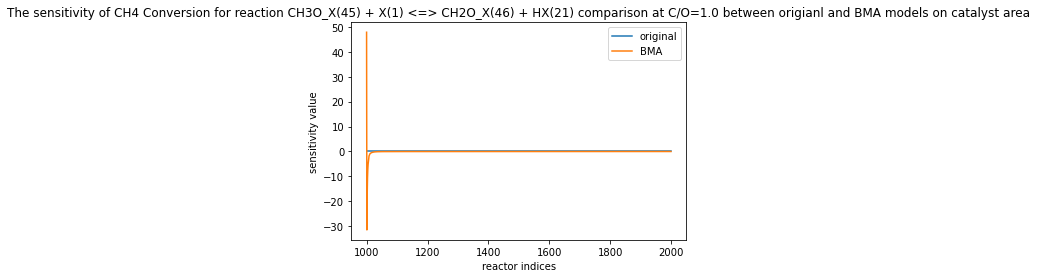

the absolute maximum index in original model is 1828, value =-5.594701645112028e-07
the absolute maximum index in BMA model is 1000, value =-23.919366864367596


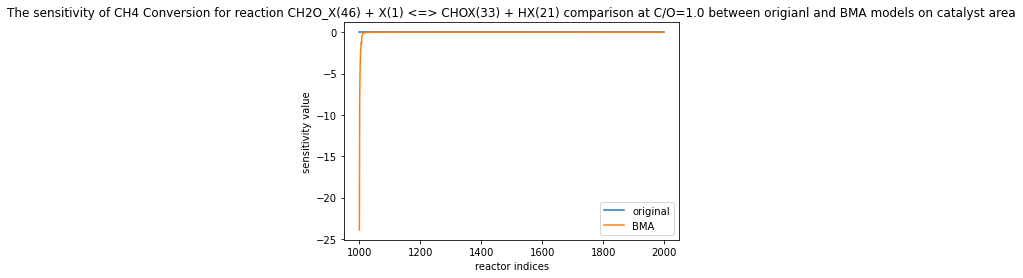

the absolute maximum index in original model is 1828, value =-5.687260623562195e-07
the absolute maximum index in BMA model is 1001, value =16.290093033426952


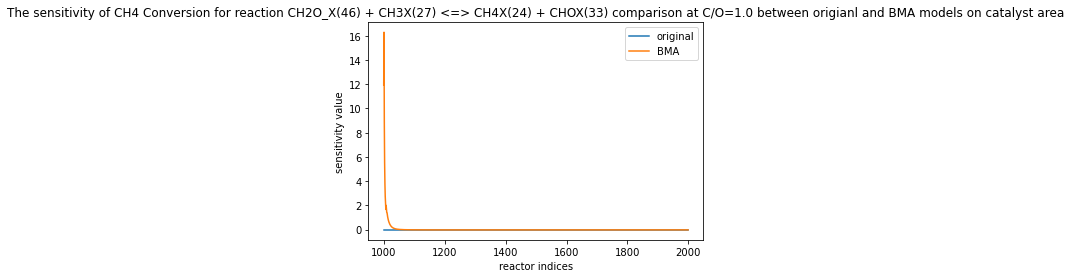

the absolute maximum index in original model is 1828, value =-5.713944132038312e-07
the absolute maximum index in BMA model is 1000, value =-23.919366838001014


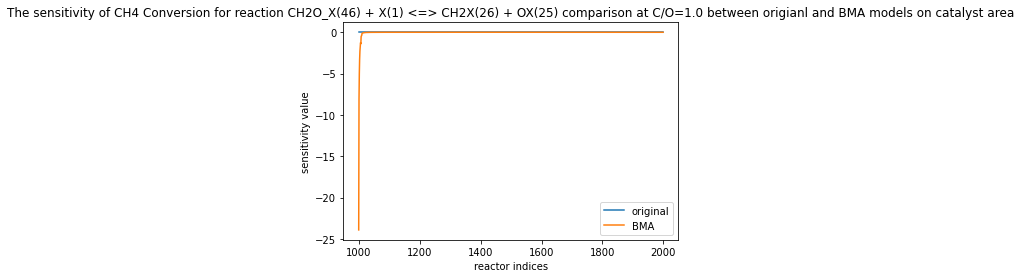

the absolute maximum index in original model is 1828, value =-5.677352250213993e-07
the absolute maximum index in BMA model is 1001, value =-19.78939083044494


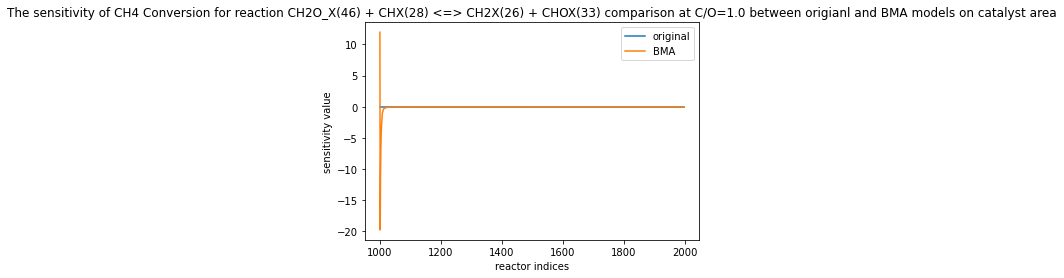

the absolute maximum index in original model is 1002, value =-4.2243790686901885
the absolute maximum index in BMA model is 1000, value =-23.919366820651284


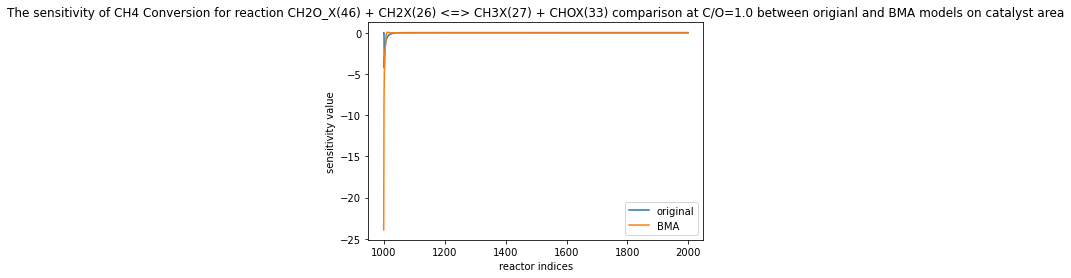

the absolute maximum index in original model is 1828, value =-5.633426276282212e-07
the absolute maximum index in BMA model is 1001, value =16.290093097567066


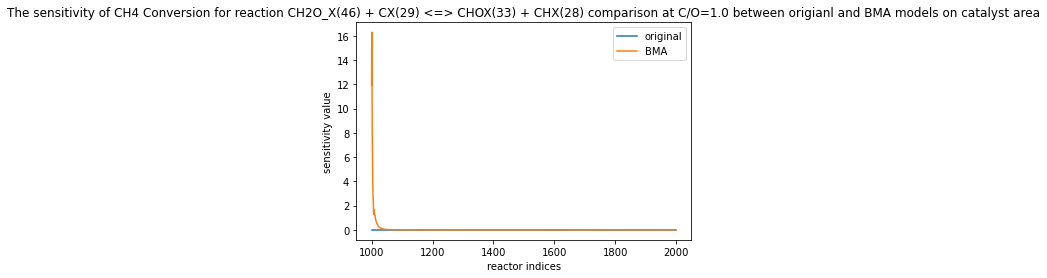

the absolute maximum index in original model is 1002, value =-4.2243788806166735
the absolute maximum index in BMA model is 1000, value =-23.919366815562945


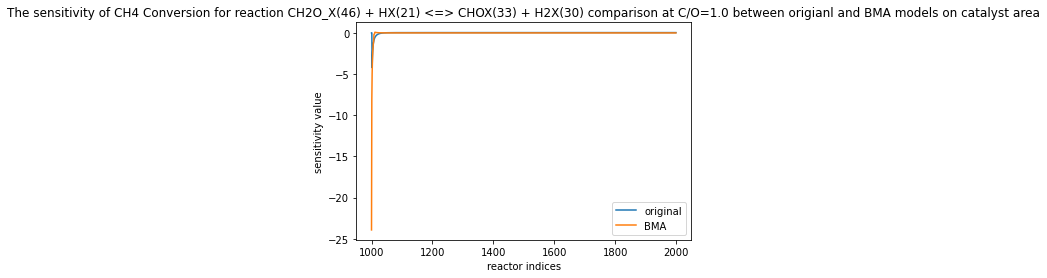

the absolute maximum index in original model is 1828, value =-6.471297365376425e-07
the absolute maximum index in BMA model is 1000, value =-23.91936681121359


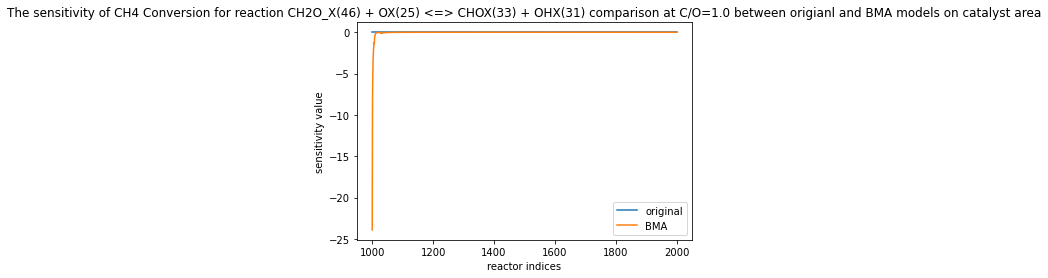

the absolute maximum index in original model is 1828, value =-6.423836059408332e-07
the absolute maximum index in BMA model is 1001, value =16.290093207033745


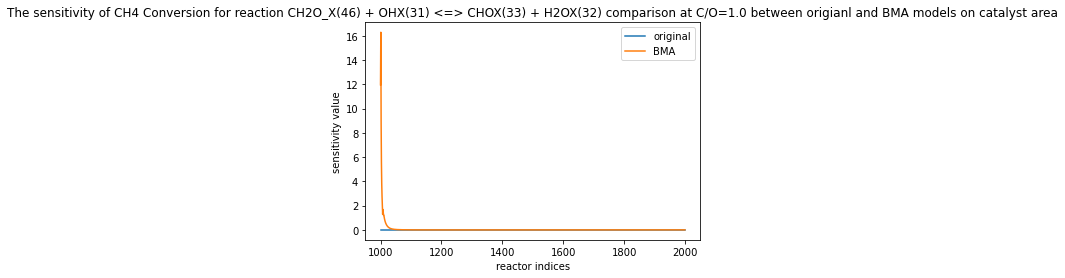

the absolute maximum index in original model is 1828, value =-6.549453126085167e-07
the absolute maximum index in BMA model is 1000, value =-23.919366826430768


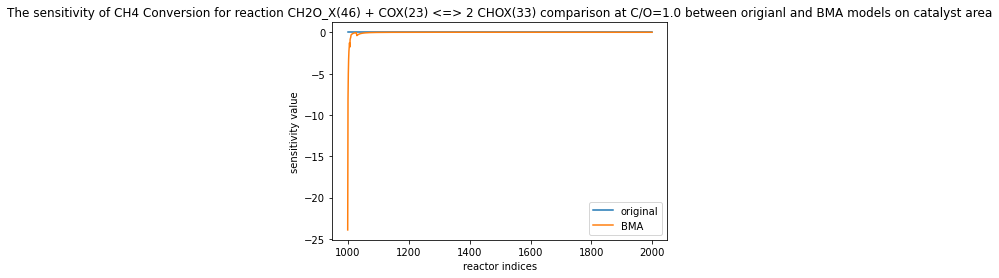

the absolute maximum index in original model is 1828, value =-6.42449096091094e-07
the absolute maximum index in BMA model is 1000, value =11.959683420554967


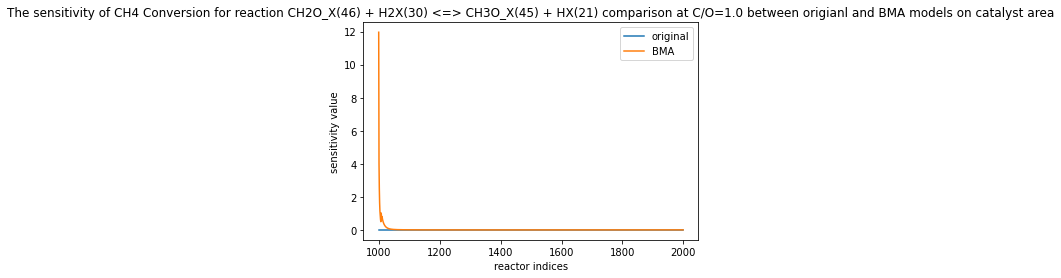

the absolute maximum index in original model is 1019, value =1.4407146269091782e-06
the absolute maximum index in BMA model is 1001, value =16.290090793578223


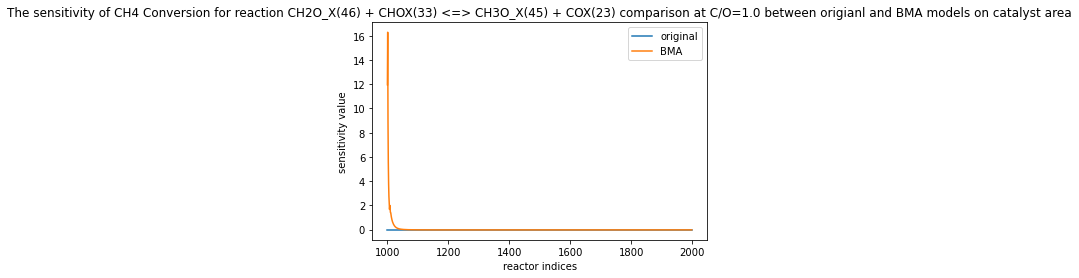

the absolute maximum index in original model is 1828, value =-6.445999161741211e-07
the absolute maximum index in BMA model is 1000, value =-22.56919014682728


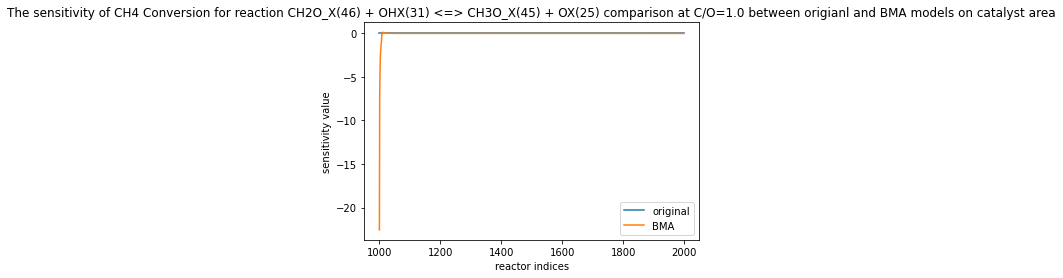

the absolute maximum index in original model is 1002, value =-4.2243787973591935
the absolute maximum index in BMA model is 1000, value =11.95968357500921


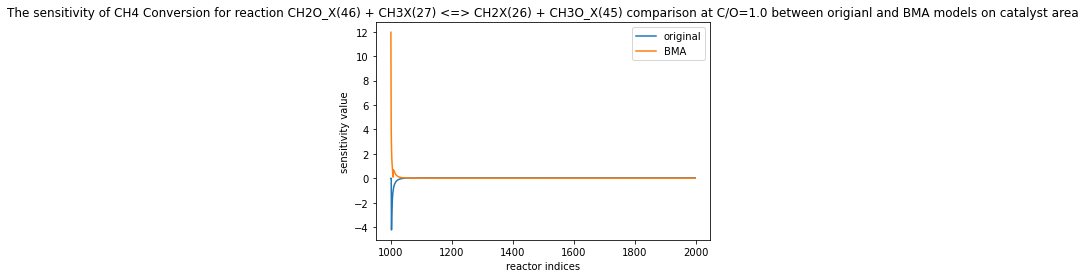

the absolute maximum index in original model is 1002, value =-4.224378422393892
the absolute maximum index in BMA model is 1000, value =-23.919366817680935


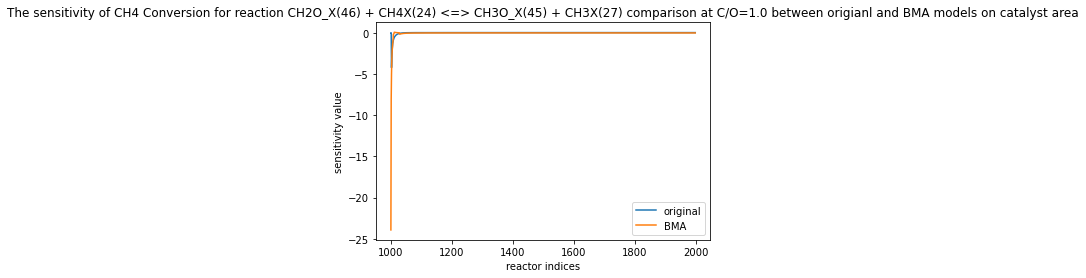

the absolute maximum index in original model is 1828, value =-6.505849159198669e-07
the absolute maximum index in BMA model is 1000, value =-23.919366808068126


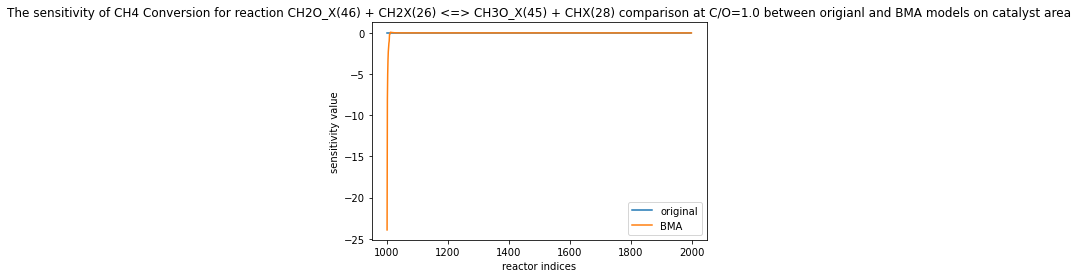

the absolute maximum index in original model is 1829, value =-5.465374683309529e-07
the absolute maximum index in BMA model is 1000, value =-23.91936681612475


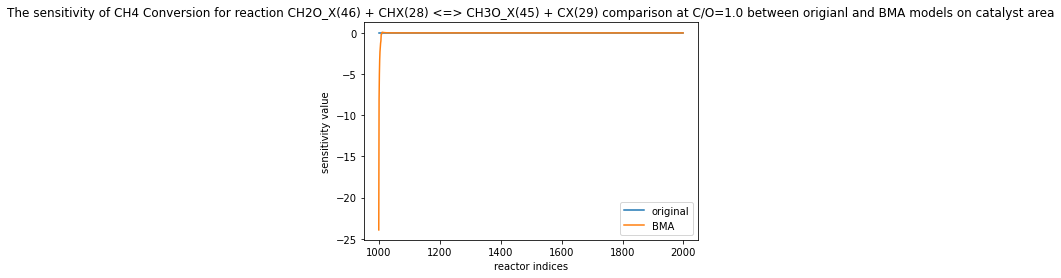

the absolute maximum index in original model is 1828, value =-5.741760641415398e-07
the absolute maximum index in BMA model is 1000, value =-23.919366829557553


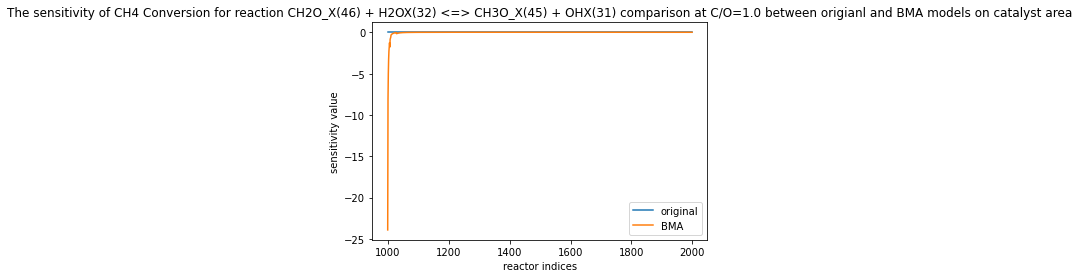

the absolute maximum index in original model is 1828, value =-5.694330695927644e-07
the absolute maximum index in BMA model is 1000, value =-23.919366814595623


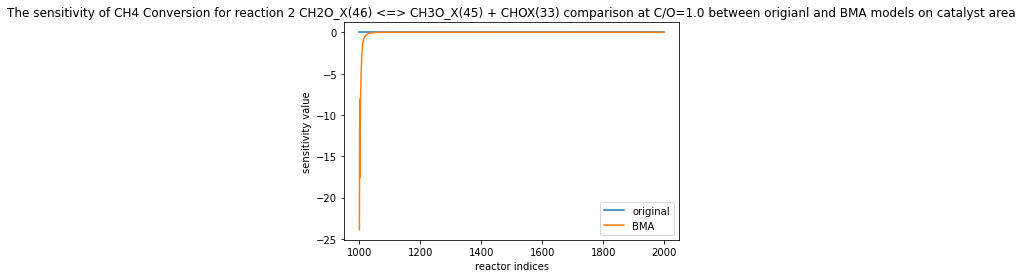

the absolute maximum index in original model is 1001, value =6.083306669570844e-07
the absolute maximum index in BMA model is 1001, value =16.29009322195581


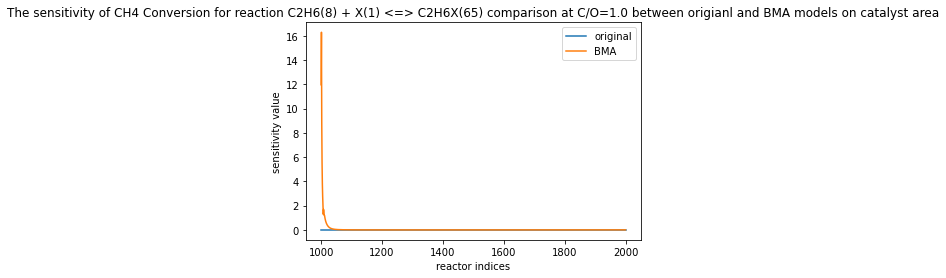

the absolute maximum index in original model is 1828, value =-5.536808541627671e-07
the absolute maximum index in BMA model is 1000, value =-23.91936674934348


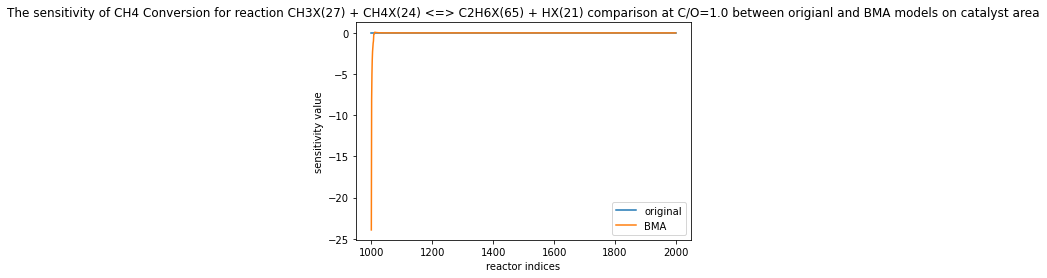

the absolute maximum index in original model is 1002, value =-4.224378822300351
the absolute maximum index in BMA model is 1000, value =-23.91936681636313


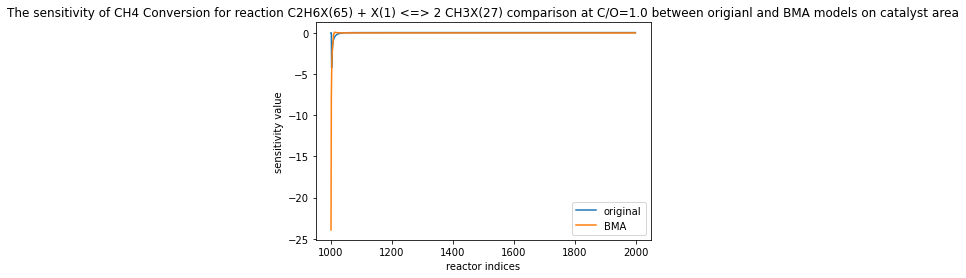

the absolute maximum index in original model is 1828, value =-5.645823133330607e-07
the absolute maximum index in BMA model is 1000, value =-23.919366886766944


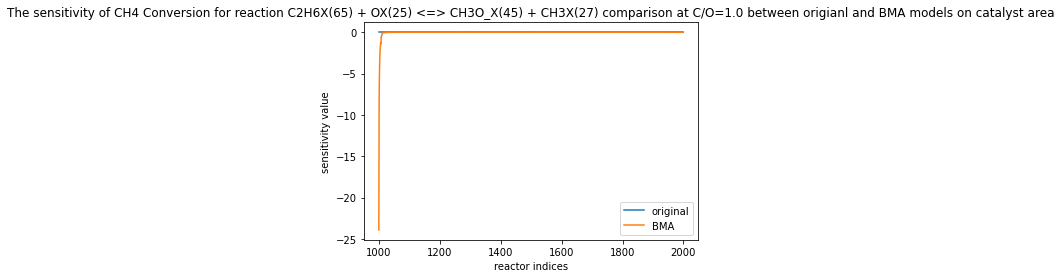

In [10]:
for i in range(107):
    compare_trends(1.0, i, 8)